## Libraries

#### 1. External libraries

In [76]:
import sys

from pandas                 import DataFrame
from pandas                 import read_csv
from numpy                  import array
from numpy                  import random
from sklearn.linear_model   import LogisticRegression
from sklearn.tree           import DecisionTreeClassifier
from sklearn.ensemble       import RandomForestClassifier
from sklearn.ensemble       import GradientBoostingClassifier
from sklearn.svm            import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors      import KNeighborsClassifier
from sklearn.metrics        import accuracy_score
from sklearn.metrics        import auc
from sklearn.metrics        import roc_auc_score
from sklearn.model_selection import GridSearchCV
from matplotlib             import pyplot

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
# Data exploration
import matplotlib.pyplot as plt

# Data processing
import pickle
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, KBinsDiscretizer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif, VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA

# Modeling
from sklearn.ensemble import StackingClassifier, BaggingClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

# Experimental setup
from sklearn.model_selection import KFold, StratifiedKFold, cross_validate

from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_validate
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# %config InlineBackend.figure_formats = ['svg']
# sns.set(style='white', palette = 'Paired')

# Experimental setup
from sklearn.model_selection import KFold, StratifiedKFold, cross_validate

# Importing machine learning algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

# For computing the scores etc
from scipy.stats import pearsonr
from sklearn.metrics import classification_report, precision_recall_curve, roc_curve, log_loss

from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier


from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
#from mlxtend.plotting import plot_decision_regions

#### 2. Local libraries

In [77]:
from ieseg import partition
from ieseg import roc
from ieseg import lift
from ieseg import cumulativeResponse
from ieseg import cumulativeGains

## Import data

#### 1. Read CSV

In [78]:
data = pd.read_csv("credit_default_train.csv")
test = pd.read_csv("credit_default_test.csv")

#### 2. Inspect data

In [79]:
data.head(2)
test.head(2)

,cust_id,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,18847,130000.0,1.0,1.0,2.0,33.0,1.0,2.0,2.0,2.0,0.0,0.0,36672.0,35807.0,40851.0,39526.0,41346.0,40630.0,0.0,6000.0,0.0,3000.0,1000.0,1100.0
1,26803,50000.0,2.0,2.0,2.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,49609.0,61162.0,31485.0,15281.0,18031.0,18233.0,2100.0,2000.0,4000.0,3000.0,1500.0,1000.0


#### 3. Inspect columns

In [80]:
data.columns

Index(['cust_id', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [81]:
data.dtypes

cust_id                         int64
LIMIT_BAL                     float64
SEX                           float64
EDUCATION                     float64
MARRIAGE                      float64
AGE                           float64
PAY_0                         float64
PAY_2                         float64
PAY_3                         float64
PAY_4                         float64
PAY_5                         float64
PAY_6                         float64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

In [82]:
data.isna().sum()

cust_id                         0
LIMIT_BAL                     202
SEX                           161
EDUCATION                     199
MARRIAGE                      170
AGE                           214
PAY_0                         195
PAY_2                         219
PAY_3                         217
PAY_4                         199
PAY_5                         185
PAY_6                         203
BILL_AMT1                     185
BILL_AMT2                     209
BILL_AMT3                     175
BILL_AMT4                     165
BILL_AMT5                     181
BILL_AMT6                     197
PAY_AMT1                      204
PAY_AMT2                      184
PAY_AMT3                      212
PAY_AMT4                      197
PAY_AMT5                      179
PAY_AMT6                      196
default.payment.next.month      0
dtype: int64

In [83]:
test.columns

Index(['cust_id', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [84]:
for d in [data,test]:
    for col in d.columns:
        s = d[col].isna().sum()
        if s>0:
            d['na_' + col] = 0
            d.loc[d[col].isna(),'na_'+col] = 1
        else:
            pass

In [85]:
data.columns

Index(['cust_id', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month', 'na_LIMIT_BAL', 'na_SEX', 'na_EDUCATION',
       'na_MARRIAGE', 'na_AGE', 'na_PAY_0', 'na_PAY_2', 'na_PAY_3', 'na_PAY_4',
       'na_PAY_5', 'na_PAY_6', 'na_BILL_AMT1', 'na_BILL_AMT2', 'na_BILL_AMT3',
       'na_BILL_AMT4', 'na_BILL_AMT5', 'na_BILL_AMT6', 'na_PAY_AMT1',
       'na_PAY_AMT2', 'na_PAY_AMT3', 'na_PAY_AMT4', 'na_PAY_AMT5',
       'na_PAY_AMT6'],
      dtype='object')

In [86]:
# #to remove skewness or standardize data
# var_to_norm = ['LIMIT_BAL','BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
#  'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
# for dat in [data,test]:
#     for col in var_to_norm:
#         # Log transforming the data to make it as normal as possible
#         dat[col] = np.sqrt(dat[col])

In [87]:
# General list of variables
id_var = ["cust_id"]  # ID
target_var = ["default.payment.next.month"]  # Target get variable
predictors = [v for v in data.columns if v not in id_var + target_var]

# List of numerical and catergorical variables
num_vars = ['LIMIT_BAL', 'AGE',
            'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
            'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
cat_vars = ['SEX', 'EDUCATION', 'MARRIAGE',
            'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

### To check NAs in columns

In [88]:
# Here, we test the effect of dropping variables with high missing percentage (>30%)
na_threshold = 0.3

# Drop num variables with more than 30% missing values
num_na_pct = data[num_vars].isnull().mean()
num_vars = num_na_pct[num_na_pct <= na_threshold].index.tolist()
print("Drop num variables with high missing pct:", num_na_pct[num_na_pct > na_threshold].tolist())

# Drop cat variables with more than 30% missing values
cat_na_pct = data[cat_vars].isnull().mean()
cat_vars = cat_na_pct[cat_na_pct <= 0.3].index.tolist()
print("Drop cat variables with high missing pct:", cat_na_pct[cat_na_pct > na_threshold].tolist())

# Update train, test
data = data[id_var + num_vars + cat_vars + target_var]
test = test[id_var + num_vars + cat_vars]

Drop num variables with high missing pct: []
Drop cat variables with high missing pct: []


## Outlier Capping

In [89]:
# Check the outliers on train, test
for v in num_vars:
    # Calculate the boundaries on train [mean-3*sd, mean+3*sd]
    mu = np.mean(data[v])
    sd = np.std(data[v])
    lower = mu - 3*sd
    upper = mu + 3*sd
    # Check outliers using the boundaries
    train_out = (data[v] < lower) | (data[v] > upper)
    test_out = (test[v] < lower) | (test[v] > upper)
    if np.sum(train_out) + np.sum(test_out) > 0:
        print(v, "has # outliers on train, test :",
              np.sum(train_out), "[", np.round(100*np.mean(train_out), 2), "% ]",
              np.sum(test_out), "[", np.round(100*np.mean(test_out), 2), "% ]")

LIMIT_BAL has # outliers on train, test : 92 [ 0.46 % ] 37 [ 0.37 % ]
AGE has # outliers on train, test : 89 [ 0.44 % ] 51 [ 0.51 % ]
BILL_AMT1 has # outliers on train, test : 454 [ 2.27 % ] 221 [ 2.21 % ]
BILL_AMT2 has # outliers on train, test : 451 [ 2.26 % ] 207 [ 2.07 % ]
BILL_AMT3 has # outliers on train, test : 438 [ 2.19 % ] 217 [ 2.17 % ]
BILL_AMT4 has # outliers on train, test : 449 [ 2.24 % ] 226 [ 2.26 % ]
BILL_AMT5 has # outliers on train, test : 428 [ 2.14 % ] 213 [ 2.13 % ]
BILL_AMT6 has # outliers on train, test : 431 [ 2.15 % ] 209 [ 2.09 % ]
PAY_AMT1 has # outliers on train, test : 282 [ 1.41 % ] 157 [ 1.57 % ]
PAY_AMT2 has # outliers on train, test : 199 [ 1.0 % ] 115 [ 1.15 % ]
PAY_AMT3 has # outliers on train, test : 253 [ 1.26 % ] 111 [ 1.11 % ]
PAY_AMT4 has # outliers on train, test : 264 [ 1.32 % ] 133 [ 1.33 % ]
PAY_AMT5 has # outliers on train, test : 277 [ 1.38 % ] 132 [ 1.32 % ]
PAY_AMT6 has # outliers on train, test : 301 [ 1.5 % ] 131 [ 1.31 % ]


In [90]:
num_vars =  ['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

for dat in [data,test]:
    for col in num_vars:
        upper_limit = dat[col].mean() + 3*dat[col].std()
        lower_limit = dat[col].mean() - 3*dat[col].std()
        dat[col] = np.where(dat[col]>upper_limit, upper_limit,
                                     np.where(dat[col]<lower_limit,lower_limit,dat[col]
    )
)

### LIMIT_BAL

In [91]:
#treated NAs with the mean of treated data
data.loc[data['LIMIT_BAL'].isna(),['LIMIT_BAL']] = np.mean(data['LIMIT_BAL']) #NAs in the column

#test data
test.loc[test['LIMIT_BAL'].isna(),['LIMIT_BAL']] = np.mean(test['LIMIT_BAL']) #NAs in the column

### Sex

In [92]:
#treated NAs with most frequent value 
data.loc[data['SEX'].isna(),['SEX']] = data['SEX'].value_counts().reset_index()['index'][0]

#test data
test.loc[test['SEX'].isna(),['SEX']] = test['SEX'].value_counts().reset_index()['index'][0]

### Education

In [93]:
#treated 0.0 and NAs with most frequent value
data.loc[data['EDUCATION']==0.0,'EDUCATION'] = data['EDUCATION'].value_counts().reset_index()['index'][0]
data.loc[data['EDUCATION'].isna(),'EDUCATION'] = data['EDUCATION'].value_counts().reset_index()['index'][0]

#test
test.loc[test['EDUCATION']==0.0,'EDUCATION'] = test['EDUCATION'].value_counts().reset_index()['index'][0]
test.loc[test['EDUCATION'].isna(),'EDUCATION'] = test['EDUCATION'].value_counts().reset_index()['index'][0]

### MARRIAGE

In [94]:
#treated 0.0 and NAs with most frequent value
data.loc[data['MARRIAGE']==0.0,'MARRIAGE'] = data['MARRIAGE'].value_counts().reset_index()['index'][0]
data.loc[data['MARRIAGE'].isna(),'MARRIAGE'] = data['MARRIAGE'].value_counts().reset_index()['index'][0]

#test
test.loc[test['MARRIAGE']==0.0,'MARRIAGE'] = test['MARRIAGE'].value_counts().reset_index()['index'][0]
test.loc[test['MARRIAGE'].isna(),'MARRIAGE'] = test['MARRIAGE'].value_counts().reset_index()['index'][0]

### AGE

In [95]:
#treating NAs by mean
data.loc[data['AGE'].isna(),'AGE'] = round(np.mean(data['AGE']))

#test
test.loc[test['AGE'].isna(),'AGE'] = round(np.mean(data['AGE']))

- 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'

In [96]:
pay_columns = ['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for dataset in [data,test]:
    for col in pay_columns:
        dataset.loc[dataset[col]<=0,col] = -1
        dataset.loc[dataset[col].isna() ,col] = dataset[col].value_counts().reset_index()['index'][0]
        #print(dataset[col].isna().sum())

- 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6' 

In [97]:
bill_amount_columns = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
for dataset in [data,test]:
    for col in bill_amount_columns:
        dataset.loc[dataset[col].isna() ,col] = round(np.mean(dataset[col]))

- 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'

In [98]:
amt_pay_columns = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
for dataset in [data,test]:
    for col in amt_pay_columns:
        dataset.loc[dataset[col].isna() ,col] = round(np.mean(dataset[col]))

### Rename Balance columns

In [99]:
#creating new variables
for dat in [data,test]:
    dat['Sep_Bal'] = dat['BILL_AMT1'] - dat['PAY_AMT1']
    dat['Aug_Bal'] = dat['BILL_AMT2'] - dat['PAY_AMT2']
    dat['Jul_Bal'] = dat['BILL_AMT3'] - dat['PAY_AMT3']
    dat['Jun_Bal'] = dat['BILL_AMT4'] - dat['PAY_AMT4']
    dat['May_Bal'] = dat['BILL_AMT5'] - dat['PAY_AMT5']
    dat['Apr_Bal'] = dat['BILL_AMT6'] - dat['PAY_AMT6']
    #data['total_remaining'] = data['remaining_amount_1']+data['remaining_amount_2']+data['remaining_amount_3']+data['remaining_amount_4']+data['remaining_amount_5']+data['remaining_amount_6']

### Rename history column names

In [100]:
#categorical Variables
for dat in [data,test]:
    dat['SEX'] = ['M' if i==1 else 'F' for i in dat['SEX']]
    dat['EDUCATION'] = ['Graduate' if i==1 else 'University' if i==2 else 'HighSchool' if i==3 else 'Other'  for i in dat['EDUCATION']]
    dat['MARRIAGE'] = ['Married' if i==1 else 'Single' if i==2 else 'Other'  for i in dat['MARRIAGE']]
    dat['Sep_Hist'] = dat['PAY_0'].apply(str)
    dat['Jul_Hist'] = dat['PAY_2'].apply(str)
    dat['Jun_Hist'] = dat['PAY_3'].apply(str)
    dat['May_Hist'] = dat['PAY_4'].apply(str)
    dat['Apr_Hist'] = dat['PAY_5'].apply(str)
    dat['Aug_Hist'] = dat['PAY_6'].apply(str)

### Rename payment column names

In [101]:
# Renaming remaing payment related columns here
column_names = {
        'payment_names': {
        'PAY_AMT1':'Sep_Pmt','PAY_AMT2':'Aug_Pmt','PAY_AMT3':'Jul_Pmt',
        'PAY_AMT4':'Jun_Pmt','PAY_AMT5':'May_Pmt','PAY_AMT6':'Apr_Pmt'
    }
}

for column_name in column_names:
    data.rename(columns=column_names[column_name], inplace=True)

#data.rename(columns={'default.payment.next.month': 'Default'}, inplace=True)

In [102]:
dat.head(2)

,cust_id,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,Sep_Bal,Aug_Bal,Jul_Bal,Jun_Bal,May_Bal,Apr_Bal,Sep_Hist,Jul_Hist,Jun_Hist,May_Hist,Apr_Hist,Aug_Hist
0,18847,130000.0,33.0,36672.0,35807.0,40851.0,39526.0,41346.0,40630.0,0.0,6000.0,0.0,3000.0,1000.0,1100.0,M,Graduate,Single,1.0,2.0,2.0,2.0,-1.0,-1.0,36672.0,29807.0,40851.0,36526.0,40346.0,39530.0,1.0,2.0,2.0,2.0,-1.0,-1.0
1,26803,50000.0,22.0,49609.0,61162.0,31485.0,15281.0,18031.0,18233.0,2100.0,2000.0,4000.0,3000.0,1500.0,1000.0,F,University,Single,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,47509.0,59162.0,27485.0,12281.0,16531.0,17233.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [103]:
data = pd.get_dummies(data)
test = pd.get_dummies(test)

In [104]:
data.head()

,cust_id,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,Sep_Pmt,Aug_Pmt,Jul_Pmt,Jun_Pmt,May_Pmt,Apr_Pmt,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default.payment.next.month,Sep_Bal,Aug_Bal,Jul_Bal,Jun_Bal,May_Bal,Apr_Bal,SEX_F,SEX_M,EDUCATION_Graduate,EDUCATION_HighSchool,EDUCATION_Other,EDUCATION_University,MARRIAGE_Married,MARRIAGE_Other,MARRIAGE_Single,Sep_Hist_-1.0,Sep_Hist_1.0,Sep_Hist_2.0,Sep_Hist_3.0,Sep_Hist_4.0,Sep_Hist_5.0,Sep_Hist_6.0,Sep_Hist_7.0,Sep_Hist_8.0,Jul_Hist_-1.0,Jul_Hist_1.0,Jul_Hist_2.0,Jul_Hist_3.0,Jul_Hist_4.0,Jul_Hist_5.0,Jul_Hist_6.0,Jul_Hist_7.0,Jul_Hist_8.0,Jun_Hist_-1.0,Jun_Hist_1.0,Jun_Hist_2.0,Jun_Hist_3.0,Jun_Hist_4.0,Jun_Hist_5.0,Jun_Hist_6.0,Jun_Hist_7.0,Jun_Hist_8.0,May_Hist_-1.0,May_Hist_1.0,May_Hist_2.0,May_Hist_3.0,May_Hist_4.0,May_Hist_5.0,May_Hist_6.0,May_Hist_7.0,May_Hist_8.0,Apr_Hist_-1.0,Apr_Hist_2.0,Apr_Hist_3.0,Apr_Hist_4.0,Apr_Hist_5.0,Apr_Hist_6.0,Apr_Hist_7.0,Apr_Hist_8.0,Aug_Hist_-1.0,Aug_Hist_2.0,Aug_Hist_3.0,Aug_Hist_4.0,Aug_Hist_5.0,Aug_Hist_6.0,Aug_Hist_7.0,Aug_Hist_8.0
0,18895,70000.0,34.0,53972.0,23149.0,23968.0,25559.0,26134.0,26715.0,1700.0,1500.0,2000.0,1000.0,1000.0,2000.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,52272.0,21649.0,21968.0,24559.0,25134.0,24715.0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,25102,390000.0,26.0,185111.0,172865.0,153795.0,140387.0,128112.0,115514.0,5000.0,3000.0,5000.0,4548.0,4100.0,3300.0,2.0,2.0,2.0,-1.0,-1.0,-1.0,0,180111.0,169865.0,148795.0,135839.0,124012.0,112214.0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,28867,60000.0,27.0,21387.0,22416.0,23444.0,26038.0,28607.0,27997.0,1378.0,1406.0,3000.0,3000.0,0.0,923.0,-1.0,-1.0,-1.0,-1.0,-1.0,2.0,1,20009.0,21010.0,20444.0,23038.0,28607.0,27074.0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1842,140000.0,55.0,108038.0,110216.0,84516.0,72391.0,61298.0,62193.0,4200.0,2822.0,2336.0,2588.0,2250.0,2491.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,103838.0,107394.0,82180.0,69803.0,59048.0,59702.0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3371,50000.0,29.0,7881.0,10415.0,3997.0,1047.0,0.0,0.0,3000.0,0.0,1000.0,0.0,0.0,0.0,2.0,2.0,2.0,-1.0,-1.0,-1.0,1,4881.0,10415.0,2997.0,1047.0,0.0,0.0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### Data Visualization


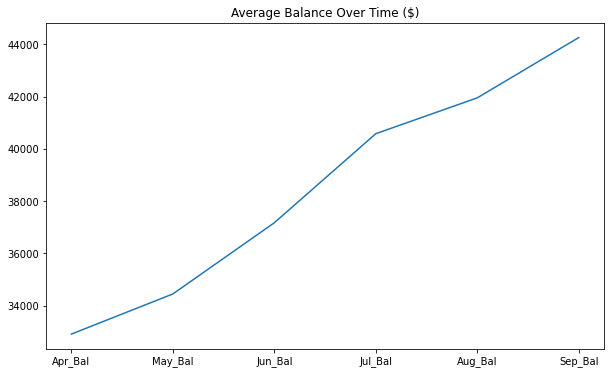

In [105]:
# Average balance over time
bal_months = ['Apr_Bal', 'May_Bal', 'Jun_Bal',
              'Jul_Bal', 'Aug_Bal', 'Sep_Bal']
avg_bal = []

for month in bal_months:
    avg_bal.append(data[month].mean())

plt.figure(figsize=(10,6))
plt.plot(bal_months, avg_bal)
plt.title('Average Balance Over Time ($)')
plt.show();

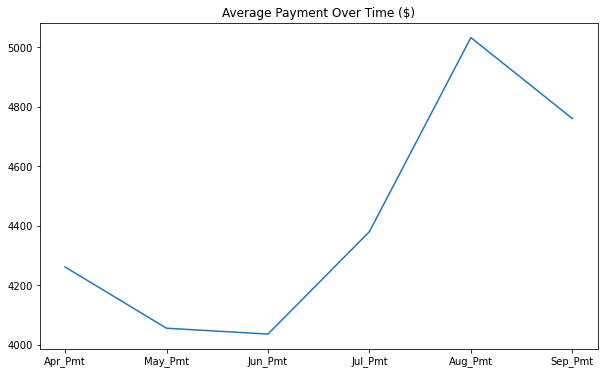

In [106]:
# Average payment over time
monthly_payments = ['Apr_Pmt', 'May_Pmt', 'Jun_Pmt',
                    'Jul_Pmt', 'Aug_Pmt', 'Sep_Pmt']
avg_pmt = []

for month in monthly_payments:
    avg_pmt.append(data[month].mean())

plt.figure(figsize=(10,6))
plt.plot(monthly_payments, avg_pmt)
plt.title('Average Payment Over Time ($)')
plt.show();

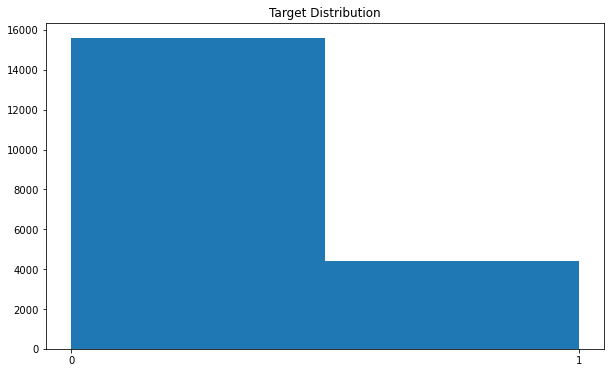

In [107]:
# The data is highly imbalanced
plt.figure(figsize=(10,6))
plt.hist(data['default.payment.next.month'], bins=2)
plt.title('Target Distribution')
plt.xticks([0,1])
plt.show();

Distribution of target classes is highly imbalanced, non-defaults far outnumber defaults.

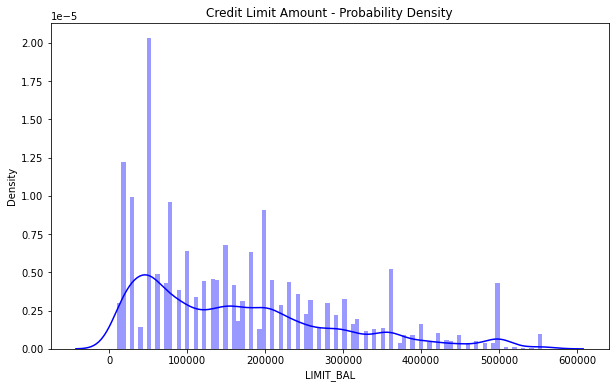

In [108]:
# Distribution of limit balance
plt.figure(figsize = (10,6))
plt.title('Credit Limit Amount - Probability Density')
plt.ticklabel_format(style='plain', axis='x')
sns.distplot(data['LIMIT_BAL'],kde=True,bins=100, color="blue")
plt.show()

In [109]:
# Top Credit Limit Amounts in our distribution
data['LIMIT_BAL'].value_counts().head()

50000.0     2213
20000.0     1334
30000.0     1081
80000.0     1050
200000.0     993
Name: LIMIT_BAL, dtype: int64

Largest Credit Limit Amount groups are 50k, 20k, and 30k

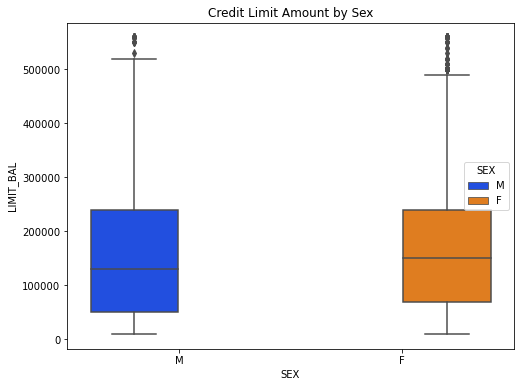

In [110]:
# Credit Limit vs Sex
plt.figure(figsize = (8,6))
plt.title('Credit Limit Amount by Sex')
plt.ticklabel_format(style='plain', axis='y')
sns.boxplot(x='SEX', y='LIMIT_BAL', hue='SEX', data=dat, palette='bright')
plt.show();

our boxplt indicate that Credit limit amount is evenly distributed amongst males and females

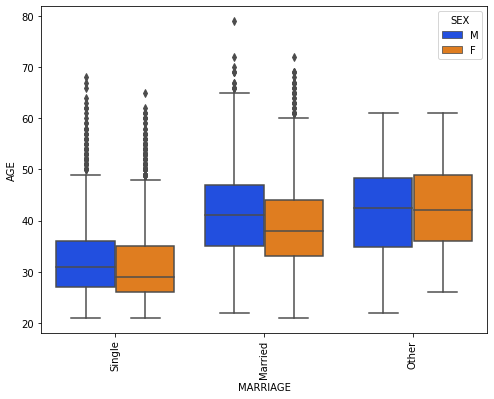

In [111]:
# Marriage, Age, and Sex
def boxplot_variation(feature1, feature2, feature3, width=16):
    fig, ax1 = plt.subplots(ncols=1, figsize=(width, 6))
    s = sns.boxplot(ax=ax1, x=feature1, y=feature2, hue=feature3,
                    data=dat, palette='bright')
    s.set_xticklabels(s.get_xticklabels(), rotation=90)
    plt.show();

boxplot_variation('MARRIAGE', 'AGE', 'SEX', 8)

The dataset mostly contains couples in their mid-30s to mid-40s and single people in their mid-20s to early-30s.

          Sep_Bal   Aug_Bal   Jul_Bal   Jun_Bal   May_Bal   Apr_Bal
Sep_Bal  1.000000  0.893889  0.852062  0.804329  0.777573  0.744661
Aug_Bal  0.893889  1.000000  0.872665  0.834757  0.803249  0.771077
Jul_Bal  0.852062  0.872665  1.000000  0.891462  0.854428  0.817893
Jun_Bal  0.804329  0.834757  0.891462  1.000000  0.889775  0.849278
May_Bal  0.777573  0.803249  0.854428  0.889775  1.000000  0.880715
Apr_Bal  0.744661  0.771077  0.817893  0.849278  0.880715  1.000000


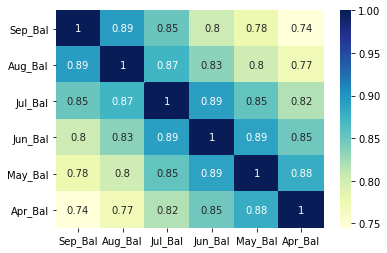

In [112]:
# Amount of Bill Statement
# Correlation Plot

# import modules
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb

# import file with data
data_hm = dat[['Sep_Bal','Aug_Bal','Jul_Bal','Jun_Bal','May_Bal','Apr_Bal']]
  
# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot
print(data_hm.corr())
  
# plotting correlation heatmap
dataplot = sb.heatmap(data_hm.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
mp.show()

Correlation between months becomes stronger the closer the months are in time

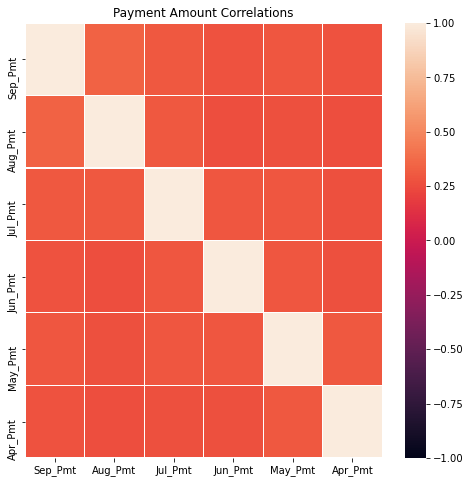

In [114]:
# Amount of Previous Payment
# Correlation Plot
values = list(column_names['payment_names'].values())

plt.figure(figsize=(8,8))
plt.title('Payment Amount Correlations')
corr = data[values].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=0.1, vmin=-1, vmax=1)
plt.show();

Payment status. Correlation strength increases the closer the months are in time. Makes sense. For example, one could assume a late payment in August would likely lead to a late payment in September. However, it is less clear we can make the same assumption for April and September

In [115]:
data.isna().sum().sum()

0

In [116]:
test.isna().sum().sum()

0

In [117]:
data.to_csv('Basetable.csv',index=False)

#### Count the number of churners

In [118]:
data[["cust_id","default.payment.next.month"]].groupby(["default.payment.next.month"]).count()

,cust_id
default.payment.next.month,
0,15586
1,4414


In [119]:
data.isna().sum()

cust_id         0
LIMIT_BAL       0
AGE             0
BILL_AMT1       0
BILL_AMT2       0
               ..
Aug_Hist_4.0    0
Aug_Hist_5.0    0
Aug_Hist_6.0    0
Aug_Hist_7.0    0
Aug_Hist_8.0    0
Length: 89, dtype: int64

## Feature Reduction

In [122]:
def FisherScore(bt, target_var, predictors):
    """
    This function calculate the Fisher score of a variable.

    Ref:
    ---
    Verbeke, W., Dejaeger, K., Martens, D., Hur, J., & Baesens, B. (2012). New insights
    into churn prediction in the telecommunication sector: A profit driven data mining
    approach. European Journal of Operational Research, 218(1), 211-229.
    """
    
    # Get the unique values of dependent variable
    target_var_val = bt[target_var].unique()
    # Calculate FisherScore for each predictor
    predictor_FisherScore = []
    for v in predictors:
        fs = np.abs(np.mean(bt.loc[bt[target_var]==target_var_val[0], v]) - np.mean(bt.loc[bt[target_var]==target_var_val[1], v])) / \
             np.sqrt(np.var(bt.loc[bt[target_var]==target_var_val[0], v]) + np.var(bt.loc[bt[target_var]==target_var_val[1], v]))
        predictor_FisherScore.append(fs)
    return predictor_FisherScore

In [123]:
# Create several lists to handle variables
id_var = ['cust_id']
target_var = ['default.payment.next.month']
predictors = [v for v in data.columns if v not in id_var + target_var]

In [124]:
# Calculate Fisher Score for all variable
fs = FisherScore(data, target_var[0], predictors)
fs_df = pd.DataFrame({"predictor":predictors, "fisherscore":fs})
fs_df = fs_df.sort_values('fisherscore', ascending=False)
fs_df.head(35)

,predictor,fisherscore
14,PAY_0,0.607051
35,Sep_Hist_-1.0,0.585316
44,Jul_Hist_-1.0,0.501050
15,PAY_2,0.490353
37,Sep_Hist_2.0,0.488483
46,Jul_Hist_2.0,0.460187
53,Jun_Hist_-1.0,0.440419
16,PAY_3,0.431545
62,May_Hist_-1.0,0.405355
55,Jun_Hist_2.0,0.400739


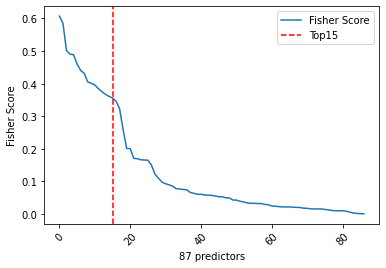

In [128]:
# Visualize the Fisher Score
plt.plot(fs_df['fisherscore'].values.squeeze())
plt.axvline(x=15, linestyle='dashed', color='red')
plt.xticks(rotation=45)
plt.xlabel(str(fs_df.shape[0]) + ' predictors')
plt.ylabel('Fisher Score')
plt.legend(['Fisher Score', 'Top15'])
plt.show()

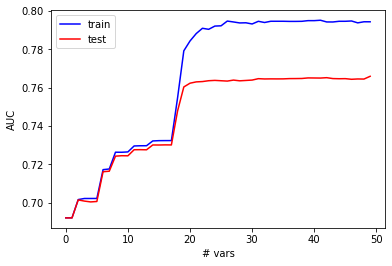

In [129]:

# Check how AUC change when add more variables: Top n vars
fs_scores = []
top_n_vars = 50
for i in range(1, top_n_vars+1):
    if i % 100 == 0: print('Added # top vars :', i)
    top_n_predictors = fs_df['predictor'][:i]
    clf = GradientBoostingClassifier(n_estimators=100)
    fs_scores.append(cross_validate(clf, data[top_n_predictors], data[target_var].values.squeeze(),
                                    scoring='roc_auc', cv=5, verbose=0, n_jobs=-1, return_train_score=True))

# How the AUC curve looks like when adding top vars
plt.plot([s['train_score'].mean() for s in fs_scores], color='blue')
plt.plot([s['test_score'].mean() for s in fs_scores], color='red')
plt.xlabel('# vars')
plt.ylabel('AUC')
plt.legend(['train', 'test'])
plt.show()

In [130]:
# Select the top variables based on Fisher Score
n_top_fs_vars = 10  # Top FS vars
top_fs_vars = fs_df['predictor'].values[:n_top_fs_vars]
print("Selected # vars :", len(top_fs_vars))
top_fs_vars

Selected # vars : 10


array(['PAY_0', 'Sep_Hist_-1.0', 'Jul_Hist_-1.0', 'PAY_2', 'Sep_Hist_2.0',
       'Jul_Hist_2.0', 'Jun_Hist_-1.0', 'PAY_3', 'May_Hist_-1.0',
       'Jun_Hist_2.0'], dtype=object)

In [131]:
var = top_fs_vars.tolist() + ['cust_id','default.payment.next.month']
test_var = top_fs_vars.tolist() + ['cust_id']

In [132]:
#to check imported basetable 
#data = read_csv("Basetable.csv")

In [133]:
d = data
t = test

In [135]:
# uncomment below lines for feature reduction
d = d[var]
t = t[test_var]

## Partition data

In [136]:
partitions = partition(dataFrame = d, splitStrategy = [0.8,0.2])

In [137]:
for (index,dataFrame) in enumerate(partitions):
    print(f"Partition {index} shape : {dataFrame.shape} ({len(dataFrame)/len(data)})")

Partition 0 shape : (16000, 12) (0.8)
Partition 1 shape : (4000, 12) (0.2)


In [138]:
trainingSet   = partitions[0]
validationSet = partitions[1]
# testSet       = partitions[2]
#trainingSet = data

#### 1. Set the features and target

In [139]:
target   = "default.payment.next.month"
features = d.columns[d.columns!=target]

In [140]:
for col in features:
    if col not in test.columns:
        test[col] = 0

#### 2. Instanciate the models

In [1635]:
tree         = DecisionTreeClassifier()
logistic     = LogisticRegression(solver = "lbfgs", max_iter = 100) #500
randomForest = RandomForestClassifier(n_estimators = 100)
boostedTree  = GradientBoostingClassifier(n_estimators=100) #100
svm          = SVC(gamma = "scale", probability = True)
neuralNet    = MLPClassifier()
neighbors    = KNeighborsClassifier()
adaBoost     = AdaBoostClassifier()
bagging      = BaggingClassifier()
histGB       = HistGradientBoostingClassifier()

In [1636]:
models = {"tree"         :tree,
          "logistic"     :logistic,
          "randomForest" :randomForest,
          "boostedTree"  :boostedTree,
          "svm"          :svm,
          "neuralNet"    :neuralNet,
          "neighbors"    :neighbors,
          "adaBoost"     :adaBoost,
          "bagging"      :bagging,
          "histGB"       :histGB
         }

#### Train the models on the training set

In [1637]:
for model in models:
    models[model].fit(trainingSet[features],trainingSet[target])
    print(f"{model} has been trained successfully")

tree has been trained successfully
logistic has been trained successfully
randomForest has been trained successfully
boostedTree has been trained successfully
svm has been trained successfully
neuralNet has been trained successfully
neighbors has been trained successfully
adaBoost has been trained successfully
bagging has been trained successfully
histGB has been trained successfully


#### Compute Accuracy and AUC for each model on train data

In [1638]:
performances = {}

for model in models:
    predictions   = models[model].predict(trainingSet[features])
    probabilities = DataFrame(models[model].predict_proba(trainingSet[features]))[1]
    accuracy      = accuracy_score(trainingSet[target],predictions)
    auc           = roc_auc_score(array(trainingSet[target]),array(probabilities))
    
    performances[model] = {"Accuracy":accuracy,"AUC":auc}

In [1639]:
DataFrame(performances)

,tree,logistic,randomForest,boostedTree,svm,neuralNet,neighbors,adaBoost,bagging,histGB
Accuracy,1.0,0.778750,0.999938,0.825562,0.778813,0.778937,0.813500,0.814875,0.981375,0.839375
AUC,1.0,0.653627,1.000000,0.809463,0.643686,0.635194,0.830676,0.783633,0.999025,0.860195


#### Compute Accuracy and AUC for each model on validation data

In [1640]:
performances = {}

for model in models:
    predictions   = models[model].predict(validationSet[features])
    probabilities = DataFrame(models[model].predict_proba(validationSet[features]))[1]
    accuracy      = accuracy_score(validationSet[target],predictions)
    auc           = roc_auc_score(array(validationSet[target]),array(probabilities))
    
    performances[model] = {"Accuracy":accuracy,"AUC":auc}

In [1641]:
DataFrame(performances)

,tree,logistic,randomForest,boostedTree,svm,neuralNet,neighbors,adaBoost,bagging,histGB
Accuracy,0.725500,0.780750,0.819250,0.822750,0.781250,0.776500,0.752250,0.815750,0.807750,0.82175
AUC,0.597211,0.652068,0.751694,0.774689,0.581651,0.616413,0.587782,0.762652,0.712476,0.76741


## Checking feature importances

In [1642]:
def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        clf = cross_validate(alg, dtrain[predictors], dtrain[target], cv=cv_folds, scoring='roc_auc')
        #cv_score = cross_val_score(clf, X, y, cv=5)
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(dtrain[target].values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob))
    
    #if performCV:
        #print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')
    return clf


Model Report
Accuracy : 0.8252
AUC Score (Train): 0.804141


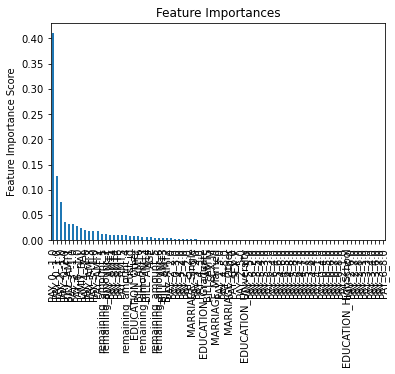

In [1643]:
algo = GradientBoostingClassifier(n_estimators=100)
b = modelfit(algo,d,features)

In [1644]:
b

{'fit_time': array([9.43847609, 9.34927058, 9.42213702, 9.34858322, 9.32245088]),
 'score_time': array([0.01822734, 0.01025367, 0.01030183, 0.01015139, 0.01016068]),
 'test_score': array([0.78725224, 0.76637215, 0.77573701, 0.77806705, 0.74698353])}

In [1645]:
for col in features:
    if col not in t.columns:
        t[col] = 0

In [1646]:
#test = pd.read_csv("credit_default_test.csv")
t = t[features]

In [1652]:
prediction = boostedTree.predict_proba(t)

In [1653]:
prediction#[:,1]

array([[0.58778815, 0.41221185],
       [0.90095425, 0.09904575],
       [0.65360652, 0.34639348],
       ...,
       [0.91714587, 0.08285413],
       [0.61865172, 0.38134828],
       [0.75381873, 0.24618127]])

In [1654]:
out = pd.DataFrame(test['cust_id'])
out['default.payment.next.month'] = prediction[:,1]

In [1655]:
out.to_csv('Output.csv',index=False)

## GridSearch CV for XGboost

In [1663]:
# XGBoost 
params = {
'learning_rate': [0.01, 0.05, 0.1],
'n_estimators': range(10, 130, 10),
'max_depth': range(4, 15, 1),
}

xgb_clf = GridSearchCV(estimator=GradientBoostingClassifier(),
                       param_grid=params,
                       cv=5,
                       scoring='roc_auc',
                       refit=True, verbose=3)

xgb_clf.fit(trainingSet[features], trainingSet[target].values.ravel())
xgb_clf_train_pred = xgb_clf.predict(trainingSet[features])

xgb_clf_train_score = accuracy_score(trainingSet[target], xgb_clf_train_pred)
print(xgb_clf_train_score)


Fitting 5 folds for each of 396 candidates, totalling 1980 fits
[CV 1/5] END learning_rate=0.01, max_depth=4, n_estimators=10;, score=0.757 total time=   0.9s
[CV 2/5] END learning_rate=0.01, max_depth=4, n_estimators=10;, score=0.761 total time=   0.9s
[CV 3/5] END learning_rate=0.01, max_depth=4, n_estimators=10;, score=0.746 total time=   0.9s
[CV 4/5] END learning_rate=0.01, max_depth=4, n_estimators=10;, score=0.780 total time=   0.9s
[CV 5/5] END learning_rate=0.01, max_depth=4, n_estimators=10;, score=0.728 total time=   1.0s
[CV 1/5] END learning_rate=0.01, max_depth=4, n_estimators=20;, score=0.758 total time=   2.1s
[CV 2/5] END learning_rate=0.01, max_depth=4, n_estimators=20;, score=0.762 total time=   2.1s
[CV 3/5] END learning_rate=0.01, max_depth=4, n_estimators=20;, score=0.754 total time=   2.2s
[CV 4/5] END learning_rate=0.01, max_depth=4, n_estimators=20;, score=0.781 total time=   2.5s
[CV 5/5] END learning_rate=0.01, max_depth=4, n_estimators=20;, score=0.732 total

[CV 2/5] END learning_rate=0.01, max_depth=5, n_estimators=60;, score=0.767 total time=   7.0s
[CV 3/5] END learning_rate=0.01, max_depth=5, n_estimators=60;, score=0.769 total time=   7.1s
[CV 4/5] END learning_rate=0.01, max_depth=5, n_estimators=60;, score=0.784 total time=   7.2s
[CV 5/5] END learning_rate=0.01, max_depth=5, n_estimators=60;, score=0.738 total time=   6.9s
[CV 1/5] END learning_rate=0.01, max_depth=5, n_estimators=70;, score=0.769 total time=   7.9s
[CV 2/5] END learning_rate=0.01, max_depth=5, n_estimators=70;, score=0.768 total time=   8.3s
[CV 3/5] END learning_rate=0.01, max_depth=5, n_estimators=70;, score=0.769 total time=   8.4s
[CV 4/5] END learning_rate=0.01, max_depth=5, n_estimators=70;, score=0.784 total time=   9.7s
[CV 5/5] END learning_rate=0.01, max_depth=5, n_estimators=70;, score=0.739 total time=   8.9s
[CV 1/5] END learning_rate=0.01, max_depth=5, n_estimators=80;, score=0.770 total time=   9.8s
[CV 2/5] END learning_rate=0.01, max_depth=5, n_es

[CV 4/5] END learning_rate=0.01, max_depth=6, n_estimators=110;, score=0.788 total time=  16.9s
[CV 5/5] END learning_rate=0.01, max_depth=6, n_estimators=110;, score=0.737 total time=  17.4s
[CV 1/5] END learning_rate=0.01, max_depth=6, n_estimators=120;, score=0.776 total time=  17.4s
[CV 2/5] END learning_rate=0.01, max_depth=6, n_estimators=120;, score=0.772 total time=  17.7s
[CV 3/5] END learning_rate=0.01, max_depth=6, n_estimators=120;, score=0.772 total time=  16.6s
[CV 4/5] END learning_rate=0.01, max_depth=6, n_estimators=120;, score=0.788 total time=  16.3s
[CV 5/5] END learning_rate=0.01, max_depth=6, n_estimators=120;, score=0.737 total time=  18.5s
[CV 1/5] END learning_rate=0.01, max_depth=7, n_estimators=10;, score=0.761 total time=   1.5s
[CV 2/5] END learning_rate=0.01, max_depth=7, n_estimators=10;, score=0.748 total time=   1.6s
[CV 3/5] END learning_rate=0.01, max_depth=7, n_estimators=10;, score=0.733 total time=   1.7s
[CV 4/5] END learning_rate=0.01, max_depth=

[CV 1/5] END learning_rate=0.01, max_depth=8, n_estimators=50;, score=0.765 total time=   9.2s
[CV 2/5] END learning_rate=0.01, max_depth=8, n_estimators=50;, score=0.754 total time=   9.3s
[CV 3/5] END learning_rate=0.01, max_depth=8, n_estimators=50;, score=0.748 total time=   9.7s
[CV 4/5] END learning_rate=0.01, max_depth=8, n_estimators=50;, score=0.771 total time=   9.1s
[CV 5/5] END learning_rate=0.01, max_depth=8, n_estimators=50;, score=0.723 total time=   8.8s
[CV 1/5] END learning_rate=0.01, max_depth=8, n_estimators=60;, score=0.766 total time=  10.6s
[CV 2/5] END learning_rate=0.01, max_depth=8, n_estimators=60;, score=0.756 total time=  10.7s
[CV 3/5] END learning_rate=0.01, max_depth=8, n_estimators=60;, score=0.750 total time=  10.9s
[CV 4/5] END learning_rate=0.01, max_depth=8, n_estimators=60;, score=0.773 total time=  10.5s
[CV 5/5] END learning_rate=0.01, max_depth=8, n_estimators=60;, score=0.724 total time=  11.5s
[CV 1/5] END learning_rate=0.01, max_depth=8, n_es

[CV 3/5] END learning_rate=0.01, max_depth=9, n_estimators=100;, score=0.752 total time=  24.4s
[CV 4/5] END learning_rate=0.01, max_depth=9, n_estimators=100;, score=0.771 total time=  21.3s
[CV 5/5] END learning_rate=0.01, max_depth=9, n_estimators=100;, score=0.723 total time=  21.1s
[CV 1/5] END learning_rate=0.01, max_depth=9, n_estimators=110;, score=0.764 total time=  24.8s
[CV 2/5] END learning_rate=0.01, max_depth=9, n_estimators=110;, score=0.759 total time=  28.4s
[CV 3/5] END learning_rate=0.01, max_depth=9, n_estimators=110;, score=0.752 total time=  26.3s
[CV 4/5] END learning_rate=0.01, max_depth=9, n_estimators=110;, score=0.771 total time=  28.2s
[CV 5/5] END learning_rate=0.01, max_depth=9, n_estimators=110;, score=0.725 total time=  28.4s
[CV 1/5] END learning_rate=0.01, max_depth=9, n_estimators=120;, score=0.764 total time=  29.5s
[CV 2/5] END learning_rate=0.01, max_depth=9, n_estimators=120;, score=0.759 total time=  26.1s
[CV 3/5] END learning_rate=0.01, max_dep

[CV 4/5] END learning_rate=0.01, max_depth=11, n_estimators=30;, score=0.725 total time=   6.9s
[CV 5/5] END learning_rate=0.01, max_depth=11, n_estimators=30;, score=0.698 total time=   7.0s
[CV 1/5] END learning_rate=0.01, max_depth=11, n_estimators=40;, score=0.744 total time=   9.1s
[CV 2/5] END learning_rate=0.01, max_depth=11, n_estimators=40;, score=0.723 total time=   9.2s
[CV 3/5] END learning_rate=0.01, max_depth=11, n_estimators=40;, score=0.722 total time=   9.5s
[CV 4/5] END learning_rate=0.01, max_depth=11, n_estimators=40;, score=0.730 total time=   9.5s
[CV 5/5] END learning_rate=0.01, max_depth=11, n_estimators=40;, score=0.702 total time=   9.4s
[CV 1/5] END learning_rate=0.01, max_depth=11, n_estimators=50;, score=0.746 total time=  12.0s
[CV 2/5] END learning_rate=0.01, max_depth=11, n_estimators=50;, score=0.723 total time=  11.8s
[CV 3/5] END learning_rate=0.01, max_depth=11, n_estimators=50;, score=0.727 total time=  12.5s
[CV 4/5] END learning_rate=0.01, max_dep

[CV 5/5] END learning_rate=0.01, max_depth=12, n_estimators=80;, score=0.690 total time=  24.4s
[CV 1/5] END learning_rate=0.01, max_depth=12, n_estimators=90;, score=0.744 total time=  30.6s
[CV 2/5] END learning_rate=0.01, max_depth=12, n_estimators=90;, score=0.714 total time=  25.0s
[CV 3/5] END learning_rate=0.01, max_depth=12, n_estimators=90;, score=0.711 total time=  26.4s
[CV 4/5] END learning_rate=0.01, max_depth=12, n_estimators=90;, score=0.726 total time=  30.1s
[CV 5/5] END learning_rate=0.01, max_depth=12, n_estimators=90;, score=0.688 total time=  27.6s
[CV 1/5] END learning_rate=0.01, max_depth=12, n_estimators=100;, score=0.745 total time=  31.5s
[CV 2/5] END learning_rate=0.01, max_depth=12, n_estimators=100;, score=0.720 total time=  30.3s
[CV 3/5] END learning_rate=0.01, max_depth=12, n_estimators=100;, score=0.714 total time=  33.6s
[CV 4/5] END learning_rate=0.01, max_depth=12, n_estimators=100;, score=0.725 total time=  34.3s
[CV 5/5] END learning_rate=0.01, max

[CV 1/5] END learning_rate=0.01, max_depth=14, n_estimators=20;, score=0.672 total time=   6.2s
[CV 2/5] END learning_rate=0.01, max_depth=14, n_estimators=20;, score=0.677 total time=   6.4s
[CV 3/5] END learning_rate=0.01, max_depth=14, n_estimators=20;, score=0.666 total time=   6.2s
[CV 4/5] END learning_rate=0.01, max_depth=14, n_estimators=20;, score=0.660 total time=   6.3s
[CV 5/5] END learning_rate=0.01, max_depth=14, n_estimators=20;, score=0.631 total time=   6.0s
[CV 1/5] END learning_rate=0.01, max_depth=14, n_estimators=30;, score=0.682 total time=   9.4s
[CV 2/5] END learning_rate=0.01, max_depth=14, n_estimators=30;, score=0.682 total time=   9.5s
[CV 3/5] END learning_rate=0.01, max_depth=14, n_estimators=30;, score=0.671 total time=   9.4s
[CV 4/5] END learning_rate=0.01, max_depth=14, n_estimators=30;, score=0.675 total time=   9.5s
[CV 5/5] END learning_rate=0.01, max_depth=14, n_estimators=30;, score=0.643 total time=   9.1s
[CV 1/5] END learning_rate=0.01, max_dep

[CV 2/5] END learning_rate=0.05, max_depth=4, n_estimators=70;, score=0.771 total time=   6.6s
[CV 3/5] END learning_rate=0.05, max_depth=4, n_estimators=70;, score=0.778 total time=   6.5s
[CV 4/5] END learning_rate=0.05, max_depth=4, n_estimators=70;, score=0.785 total time=   6.5s
[CV 5/5] END learning_rate=0.05, max_depth=4, n_estimators=70;, score=0.743 total time=   6.5s
[CV 1/5] END learning_rate=0.05, max_depth=4, n_estimators=80;, score=0.778 total time=   7.5s
[CV 2/5] END learning_rate=0.05, max_depth=4, n_estimators=80;, score=0.772 total time=   7.6s
[CV 3/5] END learning_rate=0.05, max_depth=4, n_estimators=80;, score=0.779 total time=   7.5s
[CV 4/5] END learning_rate=0.05, max_depth=4, n_estimators=80;, score=0.784 total time=   7.5s
[CV 5/5] END learning_rate=0.05, max_depth=4, n_estimators=80;, score=0.742 total time=   7.4s
[CV 1/5] END learning_rate=0.05, max_depth=4, n_estimators=90;, score=0.778 total time=   8.5s
[CV 2/5] END learning_rate=0.05, max_depth=4, n_es

[CV 3/5] END learning_rate=0.05, max_depth=5, n_estimators=120;, score=0.775 total time=  14.5s
[CV 4/5] END learning_rate=0.05, max_depth=5, n_estimators=120;, score=0.786 total time=  14.6s
[CV 5/5] END learning_rate=0.05, max_depth=5, n_estimators=120;, score=0.741 total time=  14.5s
[CV 1/5] END learning_rate=0.05, max_depth=6, n_estimators=10;, score=0.767 total time=   1.3s
[CV 2/5] END learning_rate=0.05, max_depth=6, n_estimators=10;, score=0.763 total time=   1.3s
[CV 3/5] END learning_rate=0.05, max_depth=6, n_estimators=10;, score=0.765 total time=   1.3s
[CV 4/5] END learning_rate=0.05, max_depth=6, n_estimators=10;, score=0.782 total time=   1.3s
[CV 5/5] END learning_rate=0.05, max_depth=6, n_estimators=10;, score=0.732 total time=   1.3s
[CV 1/5] END learning_rate=0.05, max_depth=6, n_estimators=20;, score=0.774 total time=   2.7s
[CV 2/5] END learning_rate=0.05, max_depth=6, n_estimators=20;, score=0.770 total time=   2.7s
[CV 3/5] END learning_rate=0.05, max_depth=6, n

[CV 5/5] END learning_rate=0.05, max_depth=7, n_estimators=50;, score=0.735 total time=   7.9s
[CV 1/5] END learning_rate=0.05, max_depth=7, n_estimators=60;, score=0.777 total time=   9.6s
[CV 2/5] END learning_rate=0.05, max_depth=7, n_estimators=60;, score=0.769 total time=   9.6s
[CV 3/5] END learning_rate=0.05, max_depth=7, n_estimators=60;, score=0.766 total time=   9.7s
[CV 4/5] END learning_rate=0.05, max_depth=7, n_estimators=60;, score=0.779 total time=   9.5s
[CV 5/5] END learning_rate=0.05, max_depth=7, n_estimators=60;, score=0.736 total time=   9.5s
[CV 1/5] END learning_rate=0.05, max_depth=7, n_estimators=70;, score=0.777 total time=  11.3s
[CV 2/5] END learning_rate=0.05, max_depth=7, n_estimators=70;, score=0.767 total time=  11.4s
[CV 3/5] END learning_rate=0.05, max_depth=7, n_estimators=70;, score=0.770 total time=  11.4s
[CV 4/5] END learning_rate=0.05, max_depth=7, n_estimators=70;, score=0.779 total time=  11.3s
[CV 5/5] END learning_rate=0.05, max_depth=7, n_es

[CV 2/5] END learning_rate=0.05, max_depth=8, n_estimators=110;, score=0.761 total time=  20.4s
[CV 3/5] END learning_rate=0.05, max_depth=8, n_estimators=110;, score=0.760 total time=  20.3s
[CV 4/5] END learning_rate=0.05, max_depth=8, n_estimators=110;, score=0.774 total time=  20.9s
[CV 5/5] END learning_rate=0.05, max_depth=8, n_estimators=110;, score=0.731 total time=  20.6s
[CV 1/5] END learning_rate=0.05, max_depth=8, n_estimators=120;, score=0.774 total time=  22.4s
[CV 2/5] END learning_rate=0.05, max_depth=8, n_estimators=120;, score=0.763 total time=  22.4s
[CV 3/5] END learning_rate=0.05, max_depth=8, n_estimators=120;, score=0.759 total time=  22.5s
[CV 4/5] END learning_rate=0.05, max_depth=8, n_estimators=120;, score=0.777 total time=  22.3s
[CV 5/5] END learning_rate=0.05, max_depth=8, n_estimators=120;, score=0.733 total time=  22.8s
[CV 1/5] END learning_rate=0.05, max_depth=9, n_estimators=10;, score=0.758 total time=   1.9s
[CV 2/5] END learning_rate=0.05, max_dept

[CV 3/5] END learning_rate=0.05, max_depth=10, n_estimators=40;, score=0.746 total time=   9.3s
[CV 4/5] END learning_rate=0.05, max_depth=10, n_estimators=40;, score=0.768 total time=   9.0s
[CV 5/5] END learning_rate=0.05, max_depth=10, n_estimators=40;, score=0.720 total time=   9.0s
[CV 1/5] END learning_rate=0.05, max_depth=10, n_estimators=50;, score=0.757 total time=  11.3s
[CV 2/5] END learning_rate=0.05, max_depth=10, n_estimators=50;, score=0.761 total time=  11.5s
[CV 3/5] END learning_rate=0.05, max_depth=10, n_estimators=50;, score=0.749 total time=  11.3s
[CV 4/5] END learning_rate=0.05, max_depth=10, n_estimators=50;, score=0.769 total time=  11.3s
[CV 5/5] END learning_rate=0.05, max_depth=10, n_estimators=50;, score=0.718 total time=  11.4s
[CV 1/5] END learning_rate=0.05, max_depth=10, n_estimators=60;, score=0.759 total time=  13.6s
[CV 2/5] END learning_rate=0.05, max_depth=10, n_estimators=60;, score=0.753 total time=  13.6s
[CV 3/5] END learning_rate=0.05, max_dep

[CV 4/5] END learning_rate=0.05, max_depth=11, n_estimators=90;, score=0.758 total time=  22.4s
[CV 5/5] END learning_rate=0.05, max_depth=11, n_estimators=90;, score=0.717 total time=  22.5s
[CV 1/5] END learning_rate=0.05, max_depth=11, n_estimators=100;, score=0.762 total time=  25.2s
[CV 2/5] END learning_rate=0.05, max_depth=11, n_estimators=100;, score=0.747 total time=  25.0s
[CV 3/5] END learning_rate=0.05, max_depth=11, n_estimators=100;, score=0.747 total time=  24.9s
[CV 4/5] END learning_rate=0.05, max_depth=11, n_estimators=100;, score=0.757 total time=  25.3s
[CV 5/5] END learning_rate=0.05, max_depth=11, n_estimators=100;, score=0.716 total time=  25.0s
[CV 1/5] END learning_rate=0.05, max_depth=11, n_estimators=110;, score=0.760 total time=  27.5s
[CV 2/5] END learning_rate=0.05, max_depth=11, n_estimators=110;, score=0.746 total time=  27.6s
[CV 3/5] END learning_rate=0.05, max_depth=11, n_estimators=110;, score=0.740 total time=  27.9s
[CV 4/5] END learning_rate=0.05,

[CV 5/5] END learning_rate=0.05, max_depth=13, n_estimators=20;, score=0.688 total time=   6.2s
[CV 1/5] END learning_rate=0.05, max_depth=13, n_estimators=30;, score=0.739 total time=   9.2s
[CV 2/5] END learning_rate=0.05, max_depth=13, n_estimators=30;, score=0.707 total time=   9.3s
[CV 3/5] END learning_rate=0.05, max_depth=13, n_estimators=30;, score=0.713 total time=   9.7s
[CV 4/5] END learning_rate=0.05, max_depth=13, n_estimators=30;, score=0.722 total time=   9.6s
[CV 5/5] END learning_rate=0.05, max_depth=13, n_estimators=30;, score=0.689 total time=   9.5s
[CV 1/5] END learning_rate=0.05, max_depth=13, n_estimators=40;, score=0.740 total time=  12.6s
[CV 2/5] END learning_rate=0.05, max_depth=13, n_estimators=40;, score=0.708 total time=  12.2s
[CV 3/5] END learning_rate=0.05, max_depth=13, n_estimators=40;, score=0.719 total time=  12.5s
[CV 4/5] END learning_rate=0.05, max_depth=13, n_estimators=40;, score=0.716 total time=  12.3s
[CV 5/5] END learning_rate=0.05, max_dep

[CV 1/5] END learning_rate=0.05, max_depth=14, n_estimators=80;, score=0.737 total time=  26.6s
[CV 2/5] END learning_rate=0.05, max_depth=14, n_estimators=80;, score=0.715 total time=  26.5s
[CV 3/5] END learning_rate=0.05, max_depth=14, n_estimators=80;, score=0.716 total time=  26.5s
[CV 4/5] END learning_rate=0.05, max_depth=14, n_estimators=80;, score=0.716 total time=  26.8s
[CV 5/5] END learning_rate=0.05, max_depth=14, n_estimators=80;, score=0.691 total time=  27.0s
[CV 1/5] END learning_rate=0.05, max_depth=14, n_estimators=90;, score=0.739 total time=  30.5s
[CV 2/5] END learning_rate=0.05, max_depth=14, n_estimators=90;, score=0.728 total time=  35.0s
[CV 3/5] END learning_rate=0.05, max_depth=14, n_estimators=90;, score=0.720 total time=  30.0s
[CV 4/5] END learning_rate=0.05, max_depth=14, n_estimators=90;, score=0.727 total time=  30.4s
[CV 5/5] END learning_rate=0.05, max_depth=14, n_estimators=90;, score=0.694 total time=  29.9s
[CV 1/5] END learning_rate=0.05, max_dep

[CV 3/5] END learning_rate=0.1, max_depth=5, n_estimators=10;, score=0.771 total time=   1.1s
[CV 4/5] END learning_rate=0.1, max_depth=5, n_estimators=10;, score=0.787 total time=   1.1s
[CV 5/5] END learning_rate=0.1, max_depth=5, n_estimators=10;, score=0.739 total time=   1.1s
[CV 1/5] END learning_rate=0.1, max_depth=5, n_estimators=20;, score=0.776 total time=   2.3s
[CV 2/5] END learning_rate=0.1, max_depth=5, n_estimators=20;, score=0.770 total time=   2.3s
[CV 3/5] END learning_rate=0.1, max_depth=5, n_estimators=20;, score=0.778 total time=   2.3s
[CV 4/5] END learning_rate=0.1, max_depth=5, n_estimators=20;, score=0.785 total time=   2.3s
[CV 5/5] END learning_rate=0.1, max_depth=5, n_estimators=20;, score=0.743 total time=   2.2s
[CV 1/5] END learning_rate=0.1, max_depth=5, n_estimators=30;, score=0.780 total time=   3.4s
[CV 2/5] END learning_rate=0.1, max_depth=5, n_estimators=30;, score=0.771 total time=   3.5s
[CV 3/5] END learning_rate=0.1, max_depth=5, n_estimators=30

[CV 5/5] END learning_rate=0.1, max_depth=6, n_estimators=60;, score=0.731 total time=   8.5s
[CV 1/5] END learning_rate=0.1, max_depth=6, n_estimators=70;, score=0.781 total time=  10.7s
[CV 2/5] END learning_rate=0.1, max_depth=6, n_estimators=70;, score=0.766 total time=  10.5s
[CV 3/5] END learning_rate=0.1, max_depth=6, n_estimators=70;, score=0.768 total time=  10.0s
[CV 4/5] END learning_rate=0.1, max_depth=6, n_estimators=70;, score=0.782 total time=  10.3s
[CV 5/5] END learning_rate=0.1, max_depth=6, n_estimators=70;, score=0.736 total time=  10.6s
[CV 1/5] END learning_rate=0.1, max_depth=6, n_estimators=80;, score=0.775 total time=  11.4s
[CV 2/5] END learning_rate=0.1, max_depth=6, n_estimators=80;, score=0.767 total time=  12.2s
[CV 3/5] END learning_rate=0.1, max_depth=6, n_estimators=80;, score=0.765 total time=  12.7s
[CV 4/5] END learning_rate=0.1, max_depth=6, n_estimators=80;, score=0.777 total time=  11.8s
[CV 5/5] END learning_rate=0.1, max_depth=6, n_estimators=80

[CV 2/5] END learning_rate=0.1, max_depth=7, n_estimators=120;, score=0.759 total time=  20.6s
[CV 3/5] END learning_rate=0.1, max_depth=7, n_estimators=120;, score=0.761 total time=  21.2s
[CV 4/5] END learning_rate=0.1, max_depth=7, n_estimators=120;, score=0.770 total time=  20.8s
[CV 5/5] END learning_rate=0.1, max_depth=7, n_estimators=120;, score=0.733 total time=  22.0s
[CV 1/5] END learning_rate=0.1, max_depth=8, n_estimators=10;, score=0.768 total time=   1.9s
[CV 2/5] END learning_rate=0.1, max_depth=8, n_estimators=10;, score=0.753 total time=   1.8s
[CV 3/5] END learning_rate=0.1, max_depth=8, n_estimators=10;, score=0.755 total time=   1.8s
[CV 4/5] END learning_rate=0.1, max_depth=8, n_estimators=10;, score=0.770 total time=   1.8s
[CV 5/5] END learning_rate=0.1, max_depth=8, n_estimators=10;, score=0.726 total time=   1.8s
[CV 1/5] END learning_rate=0.1, max_depth=8, n_estimators=20;, score=0.773 total time=   3.7s
[CV 2/5] END learning_rate=0.1, max_depth=8, n_estimator

[CV 4/5] END learning_rate=0.1, max_depth=9, n_estimators=50;, score=0.767 total time=  10.4s
[CV 5/5] END learning_rate=0.1, max_depth=9, n_estimators=50;, score=0.721 total time=  10.4s
[CV 1/5] END learning_rate=0.1, max_depth=9, n_estimators=60;, score=0.760 total time=  12.8s
[CV 2/5] END learning_rate=0.1, max_depth=9, n_estimators=60;, score=0.749 total time=  12.7s
[CV 3/5] END learning_rate=0.1, max_depth=9, n_estimators=60;, score=0.750 total time=  12.6s
[CV 4/5] END learning_rate=0.1, max_depth=9, n_estimators=60;, score=0.767 total time=  12.7s
[CV 5/5] END learning_rate=0.1, max_depth=9, n_estimators=60;, score=0.724 total time=  12.4s
[CV 1/5] END learning_rate=0.1, max_depth=9, n_estimators=70;, score=0.763 total time=  15.2s
[CV 2/5] END learning_rate=0.1, max_depth=9, n_estimators=70;, score=0.753 total time=  15.6s
[CV 3/5] END learning_rate=0.1, max_depth=9, n_estimators=70;, score=0.749 total time=  15.2s
[CV 4/5] END learning_rate=0.1, max_depth=9, n_estimators=70

[CV 1/5] END learning_rate=0.1, max_depth=10, n_estimators=110;, score=0.761 total time=  26.6s
[CV 2/5] END learning_rate=0.1, max_depth=10, n_estimators=110;, score=0.749 total time=  26.6s
[CV 3/5] END learning_rate=0.1, max_depth=10, n_estimators=110;, score=0.743 total time=  26.0s
[CV 4/5] END learning_rate=0.1, max_depth=10, n_estimators=110;, score=0.751 total time=  29.4s
[CV 5/5] END learning_rate=0.1, max_depth=10, n_estimators=110;, score=0.717 total time=  28.7s
[CV 1/5] END learning_rate=0.1, max_depth=10, n_estimators=120;, score=0.759 total time=  30.4s
[CV 2/5] END learning_rate=0.1, max_depth=10, n_estimators=120;, score=0.748 total time=  31.6s
[CV 3/5] END learning_rate=0.1, max_depth=10, n_estimators=120;, score=0.741 total time=  30.5s
[CV 4/5] END learning_rate=0.1, max_depth=10, n_estimators=120;, score=0.756 total time=  30.0s
[CV 5/5] END learning_rate=0.1, max_depth=10, n_estimators=120;, score=0.719 total time=  29.7s
[CV 1/5] END learning_rate=0.1, max_dept

[CV 2/5] END learning_rate=0.1, max_depth=12, n_estimators=40;, score=0.744 total time=  10.8s
[CV 3/5] END learning_rate=0.1, max_depth=12, n_estimators=40;, score=0.737 total time=  10.9s
[CV 4/5] END learning_rate=0.1, max_depth=12, n_estimators=40;, score=0.751 total time=  11.1s
[CV 5/5] END learning_rate=0.1, max_depth=12, n_estimators=40;, score=0.701 total time=  10.9s
[CV 1/5] END learning_rate=0.1, max_depth=12, n_estimators=50;, score=0.749 total time=  13.6s
[CV 2/5] END learning_rate=0.1, max_depth=12, n_estimators=50;, score=0.736 total time=  13.8s
[CV 3/5] END learning_rate=0.1, max_depth=12, n_estimators=50;, score=0.739 total time=  13.7s
[CV 4/5] END learning_rate=0.1, max_depth=12, n_estimators=50;, score=0.747 total time=  13.6s
[CV 5/5] END learning_rate=0.1, max_depth=12, n_estimators=50;, score=0.702 total time=  13.8s
[CV 1/5] END learning_rate=0.1, max_depth=12, n_estimators=60;, score=0.754 total time=  16.4s
[CV 2/5] END learning_rate=0.1, max_depth=12, n_es

[CV 4/5] END learning_rate=0.1, max_depth=13, n_estimators=90;, score=0.740 total time=  29.6s
[CV 5/5] END learning_rate=0.1, max_depth=13, n_estimators=90;, score=0.706 total time=  31.8s
[CV 1/5] END learning_rate=0.1, max_depth=13, n_estimators=100;, score=0.754 total time=  40.4s
[CV 2/5] END learning_rate=0.1, max_depth=13, n_estimators=100;, score=0.734 total time=  36.8s
[CV 3/5] END learning_rate=0.1, max_depth=13, n_estimators=100;, score=0.737 total time=  35.3s
[CV 4/5] END learning_rate=0.1, max_depth=13, n_estimators=100;, score=0.746 total time=  37.6s
[CV 5/5] END learning_rate=0.1, max_depth=13, n_estimators=100;, score=0.709 total time=  36.3s
[CV 1/5] END learning_rate=0.1, max_depth=13, n_estimators=110;, score=0.753 total time=  38.9s
[CV 2/5] END learning_rate=0.1, max_depth=13, n_estimators=110;, score=0.735 total time=  38.0s
[CV 3/5] END learning_rate=0.1, max_depth=13, n_estimators=110;, score=0.730 total time=  38.1s
[CV 4/5] END learning_rate=0.1, max_depth=

In [1664]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(trainingSet[target], xgb_clf_train_pred))
print(xgb_clf.best_params_)

xgb_clf_test_pred = xgb_clf.predict(validationSet[features])

xgb_clf_test_score = accuracy_score(validationSet[target], xgb_clf_test_pred)
print(xgb_clf_test_score)
print(classification_report(validationSet[target], xgb_clf_test_pred))
print(confusion_matrix(validationSet[target], xgb_clf_test_pred))
print(xgb_clf.best_params_)

[[12004   457]
 [ 2191  1348]]
{'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 60}
0.8245
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      3125
           1       0.70      0.34      0.46       875

    accuracy                           0.82      4000
   macro avg       0.77      0.65      0.68      4000
weighted avg       0.81      0.82      0.80      4000

[[3000  125]
 [ 577  298]]
{'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 60}


In [1665]:
pred = xgb_clf.predict_proba(t[features])
out = pd.DataFrame(test['cust_id'])
out['default.payment.next.month'] = pred[:,1]

In [1666]:
out.to_csv('Outputgcvboost.csv',index=False)

In [1667]:
predictions   = xgb_clf.predict(validationSet[features])
probabilities = DataFrame(xgb_clf.predict_proba(validationSet[features]))[1]
accuracy      = accuracy_score(validationSet[target],predictions)
auc           = roc_auc_score(array(validationSet[target]),array(probabilities))

In [1668]:
print({"Accuracy":accuracy,"AUC":auc})

{'Accuracy': 0.8245, 'AUC': 0.7741301028571428}


## CV for boosted tree

In [ ]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC

In [ ]:
boostedTree  = GradientBoostingClassifier(n_estimators=100)

In [ ]:
cv_results = cross_validate(boostedTree, d[features], d[target], cv=5)
print(sorted(cv_results.keys()))

print(cv_results['test_score'])

In [ ]:
scores = cross_validate(boostedTree,d[features], d[target], cv=5,
                        scoring=('roc_auc'),
                        return_train_score=True)
#print(scores['roc_auc'])

#print(scores['train_r2'])

In [ ]:
print(scores)

## Gridsearch CV Random Forest

In [1669]:
# random forest
params = {
'criterion': ["gini", "entropy"],
'max_features': ["auto", "sqrt", "log2"],
'n_estimators': range(10, 130, 10),
'max_depth': range(4, 15, 1),
}

rf_clf = GridSearchCV(estimator=RandomForestClassifier(),
                       param_grid=params,
                       cv=5,
                       scoring='roc_auc',
                       refit=True, verbose=3)

rf_clf.fit(trainingSet[features], trainingSet[target].values.ravel())
rf_clf_train_pred = rf_clf.predict(trainingSet[features])

rf_clf_train_score = accuracy_score(trainingSet[target], rf_clf_train_pred)
print(rf_clf_train_score)


Fitting 5 folds for each of 792 candidates, totalling 3960 fits
[CV 1/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=10;, score=0.772 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=10;, score=0.766 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=10;, score=0.761 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=10;, score=0.775 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=10;, score=0.732 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=20;, score=0.770 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=20;, score=0.762 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=20;, score=0.766 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=4, max_features=a

[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=30;, score=0.737 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=40;, score=0.770 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=40;, score=0.760 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=40;, score=0.767 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=40;, score=0.778 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=40;, score=0.733 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=50;, score=0.771 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=50;, score=0.763 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=50;, score=0.770 total time=   0.4s
[CV 4/5] E

[CV 5/5] END criterion=gini, max_depth=4, max_features=log2, n_estimators=60;, score=0.737 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=4, max_features=log2, n_estimators=70;, score=0.768 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, n_estimators=70;, score=0.764 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=4, max_features=log2, n_estimators=70;, score=0.767 total time=   0.4s
[CV 4/5] END criterion=gini, max_depth=4, max_features=log2, n_estimators=70;, score=0.778 total time=   0.4s
[CV 5/5] END criterion=gini, max_depth=4, max_features=log2, n_estimators=70;, score=0.734 total time=   0.4s
[CV 1/5] END criterion=gini, max_depth=4, max_features=log2, n_estimators=80;, score=0.771 total time=   0.5s
[CV 2/5] END criterion=gini, max_depth=4, max_features=log2, n_estimators=80;, score=0.763 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=4, max_features=log2, n_estimators=80;, score=0.767 total time=   0.5s
[CV 4/5] E

[CV 5/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=90;, score=0.741 total time=   0.9s
[CV 1/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=100;, score=0.773 total time=   1.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=100;, score=0.766 total time=   1.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=100;, score=0.769 total time=   1.1s
[CV 4/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=100;, score=0.782 total time=   1.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=100;, score=0.739 total time=   1.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=110;, score=0.773 total time=   1.1s
[CV 2/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=110;, score=0.766 total time=   1.1s
[CV 3/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=110;, score=0.770 total time=   1.1s
[C

[CV 5/5] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=120;, score=0.739 total time=   1.2s
[CV 1/5] END criterion=gini, max_depth=5, max_features=log2, n_estimators=10;, score=0.763 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=5, max_features=log2, n_estimators=10;, score=0.762 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=5, max_features=log2, n_estimators=10;, score=0.762 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=5, max_features=log2, n_estimators=10;, score=0.778 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=5, max_features=log2, n_estimators=10;, score=0.737 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=5, max_features=log2, n_estimators=20;, score=0.768 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=5, max_features=log2, n_estimators=20;, score=0.761 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=5, max_features=log2, n_estimators=20;, score=0.770 total time=   0.1s
[CV 4/5] 

[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, n_estimators=30;, score=0.741 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, n_estimators=40;, score=0.774 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, n_estimators=40;, score=0.767 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, n_estimators=40;, score=0.770 total time=   0.4s
[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, n_estimators=40;, score=0.784 total time=   0.4s
[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, n_estimators=40;, score=0.743 total time=   0.4s
[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, n_estimators=50;, score=0.774 total time=   0.5s
[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, n_estimators=50;, score=0.769 total time=   0.5s
[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, n_estimators=50;, score=0.770 total time=   0.5s
[CV 4/5] E

[CV 5/5] END criterion=gini, max_depth=6, max_features=sqrt, n_estimators=60;, score=0.741 total time=   0.7s
[CV 1/5] END criterion=gini, max_depth=6, max_features=sqrt, n_estimators=70;, score=0.775 total time=   0.8s
[CV 2/5] END criterion=gini, max_depth=6, max_features=sqrt, n_estimators=70;, score=0.767 total time=   0.8s
[CV 3/5] END criterion=gini, max_depth=6, max_features=sqrt, n_estimators=70;, score=0.772 total time=   0.8s
[CV 4/5] END criterion=gini, max_depth=6, max_features=sqrt, n_estimators=70;, score=0.785 total time=   0.8s
[CV 5/5] END criterion=gini, max_depth=6, max_features=sqrt, n_estimators=70;, score=0.741 total time=   0.8s
[CV 1/5] END criterion=gini, max_depth=6, max_features=sqrt, n_estimators=80;, score=0.776 total time=   0.9s
[CV 2/5] END criterion=gini, max_depth=6, max_features=sqrt, n_estimators=80;, score=0.769 total time=   0.9s
[CV 3/5] END criterion=gini, max_depth=6, max_features=sqrt, n_estimators=80;, score=0.773 total time=   0.9s
[CV 4/5] E

[CV 5/5] END criterion=gini, max_depth=6, max_features=log2, n_estimators=90;, score=0.739 total time=   0.7s
[CV 1/5] END criterion=gini, max_depth=6, max_features=log2, n_estimators=100;, score=0.774 total time=   0.8s
[CV 2/5] END criterion=gini, max_depth=6, max_features=log2, n_estimators=100;, score=0.768 total time=   0.8s
[CV 3/5] END criterion=gini, max_depth=6, max_features=log2, n_estimators=100;, score=0.770 total time=   0.8s
[CV 4/5] END criterion=gini, max_depth=6, max_features=log2, n_estimators=100;, score=0.783 total time=   0.8s
[CV 5/5] END criterion=gini, max_depth=6, max_features=log2, n_estimators=100;, score=0.740 total time=   0.8s
[CV 1/5] END criterion=gini, max_depth=6, max_features=log2, n_estimators=110;, score=0.774 total time=   0.9s
[CV 2/5] END criterion=gini, max_depth=6, max_features=log2, n_estimators=110;, score=0.767 total time=   0.9s
[CV 3/5] END criterion=gini, max_depth=6, max_features=log2, n_estimators=110;, score=0.770 total time=   0.9s
[C

[CV 5/5] END criterion=gini, max_depth=7, max_features=auto, n_estimators=120;, score=0.744 total time=   1.6s
[CV 1/5] END criterion=gini, max_depth=7, max_features=sqrt, n_estimators=10;, score=0.771 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=7, max_features=sqrt, n_estimators=10;, score=0.763 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=7, max_features=sqrt, n_estimators=10;, score=0.771 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=7, max_features=sqrt, n_estimators=10;, score=0.779 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=7, max_features=sqrt, n_estimators=10;, score=0.737 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=7, max_features=sqrt, n_estimators=20;, score=0.769 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=7, max_features=sqrt, n_estimators=20;, score=0.764 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=7, max_features=sqrt, n_estimators=20;, score=0.770 total time=   0.2s
[CV 4/5] 

[CV 5/5] END criterion=gini, max_depth=7, max_features=log2, n_estimators=30;, score=0.740 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=7, max_features=log2, n_estimators=40;, score=0.777 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=7, max_features=log2, n_estimators=40;, score=0.768 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=7, max_features=log2, n_estimators=40;, score=0.775 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=7, max_features=log2, n_estimators=40;, score=0.784 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=7, max_features=log2, n_estimators=40;, score=0.742 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=7, max_features=log2, n_estimators=50;, score=0.775 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=7, max_features=log2, n_estimators=50;, score=0.770 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=7, max_features=log2, n_estimators=50;, score=0.773 total time=   0.4s
[CV 4/5] E

[CV 5/5] END criterion=gini, max_depth=8, max_features=auto, n_estimators=60;, score=0.741 total time=   0.8s
[CV 1/5] END criterion=gini, max_depth=8, max_features=auto, n_estimators=70;, score=0.778 total time=   1.0s
[CV 2/5] END criterion=gini, max_depth=8, max_features=auto, n_estimators=70;, score=0.770 total time=   1.0s
[CV 3/5] END criterion=gini, max_depth=8, max_features=auto, n_estimators=70;, score=0.776 total time=   1.0s
[CV 4/5] END criterion=gini, max_depth=8, max_features=auto, n_estimators=70;, score=0.782 total time=   1.0s
[CV 5/5] END criterion=gini, max_depth=8, max_features=auto, n_estimators=70;, score=0.744 total time=   1.0s
[CV 1/5] END criterion=gini, max_depth=8, max_features=auto, n_estimators=80;, score=0.780 total time=   1.2s
[CV 2/5] END criterion=gini, max_depth=8, max_features=auto, n_estimators=80;, score=0.770 total time=   1.1s
[CV 3/5] END criterion=gini, max_depth=8, max_features=auto, n_estimators=80;, score=0.774 total time=   1.1s
[CV 4/5] E

[CV 5/5] END criterion=gini, max_depth=8, max_features=sqrt, n_estimators=90;, score=0.744 total time=   1.3s
[CV 1/5] END criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100;, score=0.780 total time=   1.5s
[CV 2/5] END criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100;, score=0.772 total time=   1.5s
[CV 3/5] END criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100;, score=0.775 total time=   1.5s
[CV 4/5] END criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100;, score=0.784 total time=   1.5s
[CV 5/5] END criterion=gini, max_depth=8, max_features=sqrt, n_estimators=100;, score=0.743 total time=   1.5s
[CV 1/5] END criterion=gini, max_depth=8, max_features=sqrt, n_estimators=110;, score=0.778 total time=   1.6s
[CV 2/5] END criterion=gini, max_depth=8, max_features=sqrt, n_estimators=110;, score=0.773 total time=   1.6s
[CV 3/5] END criterion=gini, max_depth=8, max_features=sqrt, n_estimators=110;, score=0.776 total time=   1.6s
[C

[CV 5/5] END criterion=gini, max_depth=8, max_features=log2, n_estimators=120;, score=0.743 total time=   1.3s
[CV 1/5] END criterion=gini, max_depth=9, max_features=auto, n_estimators=10;, score=0.779 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=9, max_features=auto, n_estimators=10;, score=0.759 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=9, max_features=auto, n_estimators=10;, score=0.766 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=9, max_features=auto, n_estimators=10;, score=0.776 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=9, max_features=auto, n_estimators=10;, score=0.734 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=9, max_features=auto, n_estimators=20;, score=0.774 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=9, max_features=auto, n_estimators=20;, score=0.765 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=9, max_features=auto, n_estimators=20;, score=0.772 total time=   0.3s
[CV 4/5] 

[CV 5/5] END criterion=gini, max_depth=9, max_features=sqrt, n_estimators=30;, score=0.742 total time=   0.4s
[CV 1/5] END criterion=gini, max_depth=9, max_features=sqrt, n_estimators=40;, score=0.772 total time=   0.6s
[CV 2/5] END criterion=gini, max_depth=9, max_features=sqrt, n_estimators=40;, score=0.772 total time=   0.6s
[CV 3/5] END criterion=gini, max_depth=9, max_features=sqrt, n_estimators=40;, score=0.770 total time=   0.6s
[CV 4/5] END criterion=gini, max_depth=9, max_features=sqrt, n_estimators=40;, score=0.779 total time=   0.6s
[CV 5/5] END criterion=gini, max_depth=9, max_features=sqrt, n_estimators=40;, score=0.743 total time=   0.6s
[CV 1/5] END criterion=gini, max_depth=9, max_features=sqrt, n_estimators=50;, score=0.777 total time=   0.8s
[CV 2/5] END criterion=gini, max_depth=9, max_features=sqrt, n_estimators=50;, score=0.772 total time=   0.8s
[CV 3/5] END criterion=gini, max_depth=9, max_features=sqrt, n_estimators=50;, score=0.775 total time=   0.8s
[CV 4/5] E

[CV 5/5] END criterion=gini, max_depth=9, max_features=log2, n_estimators=60;, score=0.742 total time=   0.7s
[CV 1/5] END criterion=gini, max_depth=9, max_features=log2, n_estimators=70;, score=0.778 total time=   0.8s
[CV 2/5] END criterion=gini, max_depth=9, max_features=log2, n_estimators=70;, score=0.771 total time=   0.8s
[CV 3/5] END criterion=gini, max_depth=9, max_features=log2, n_estimators=70;, score=0.773 total time=   0.8s
[CV 4/5] END criterion=gini, max_depth=9, max_features=log2, n_estimators=70;, score=0.787 total time=   0.8s
[CV 5/5] END criterion=gini, max_depth=9, max_features=log2, n_estimators=70;, score=0.740 total time=   0.8s
[CV 1/5] END criterion=gini, max_depth=9, max_features=log2, n_estimators=80;, score=0.779 total time=   0.9s
[CV 2/5] END criterion=gini, max_depth=9, max_features=log2, n_estimators=80;, score=0.769 total time=   0.9s
[CV 3/5] END criterion=gini, max_depth=9, max_features=log2, n_estimators=80;, score=0.773 total time=   0.9s
[CV 4/5] E

[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, n_estimators=90;, score=0.783 total time=   1.6s
[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, n_estimators=90;, score=0.742 total time=   1.6s
[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, n_estimators=100;, score=0.776 total time=   1.8s
[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, n_estimators=100;, score=0.774 total time=   1.8s
[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, n_estimators=100;, score=0.772 total time=   1.8s
[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, n_estimators=100;, score=0.782 total time=   1.8s
[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, n_estimators=100;, score=0.745 total time=   1.7s
[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, n_estimators=110;, score=0.778 total time=   1.9s
[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, n_estimators=110;, score=0.773 total time=  

[CV 3/5] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=120;, score=0.775 total time=   2.2s
[CV 4/5] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=120;, score=0.782 total time=   2.1s
[CV 5/5] END criterion=gini, max_depth=10, max_features=sqrt, n_estimators=120;, score=0.744 total time=   2.2s
[CV 1/5] END criterion=gini, max_depth=10, max_features=log2, n_estimators=10;, score=0.766 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=10, max_features=log2, n_estimators=10;, score=0.758 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=10, max_features=log2, n_estimators=10;, score=0.756 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=10, max_features=log2, n_estimators=10;, score=0.775 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=10, max_features=log2, n_estimators=10;, score=0.729 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=10, max_features=log2, n_estimators=20;, score=0.770 total time=   0.2

[CV 2/5] END criterion=gini, max_depth=11, max_features=auto, n_estimators=30;, score=0.770 total time=   0.5s
[CV 3/5] END criterion=gini, max_depth=11, max_features=auto, n_estimators=30;, score=0.774 total time=   0.5s
[CV 4/5] END criterion=gini, max_depth=11, max_features=auto, n_estimators=30;, score=0.773 total time=   0.5s
[CV 5/5] END criterion=gini, max_depth=11, max_features=auto, n_estimators=30;, score=0.737 total time=   0.5s
[CV 1/5] END criterion=gini, max_depth=11, max_features=auto, n_estimators=40;, score=0.781 total time=   0.7s
[CV 2/5] END criterion=gini, max_depth=11, max_features=auto, n_estimators=40;, score=0.773 total time=   0.7s
[CV 3/5] END criterion=gini, max_depth=11, max_features=auto, n_estimators=40;, score=0.770 total time=   0.7s
[CV 4/5] END criterion=gini, max_depth=11, max_features=auto, n_estimators=40;, score=0.775 total time=   0.7s
[CV 5/5] END criterion=gini, max_depth=11, max_features=auto, n_estimators=40;, score=0.746 total time=   0.7s
[

[CV 1/5] END criterion=gini, max_depth=11, max_features=sqrt, n_estimators=60;, score=0.773 total time=   1.2s
[CV 2/5] END criterion=gini, max_depth=11, max_features=sqrt, n_estimators=60;, score=0.768 total time=   1.1s
[CV 3/5] END criterion=gini, max_depth=11, max_features=sqrt, n_estimators=60;, score=0.771 total time=   1.1s
[CV 4/5] END criterion=gini, max_depth=11, max_features=sqrt, n_estimators=60;, score=0.779 total time=   1.1s
[CV 5/5] END criterion=gini, max_depth=11, max_features=sqrt, n_estimators=60;, score=0.743 total time=   1.1s
[CV 1/5] END criterion=gini, max_depth=11, max_features=sqrt, n_estimators=70;, score=0.777 total time=   1.3s
[CV 2/5] END criterion=gini, max_depth=11, max_features=sqrt, n_estimators=70;, score=0.772 total time=   1.3s
[CV 3/5] END criterion=gini, max_depth=11, max_features=sqrt, n_estimators=70;, score=0.774 total time=   1.3s
[CV 4/5] END criterion=gini, max_depth=11, max_features=sqrt, n_estimators=70;, score=0.778 total time=   1.3s
[

[CV 5/5] END criterion=gini, max_depth=11, max_features=log2, n_estimators=80;, score=0.741 total time=   1.1s
[CV 1/5] END criterion=gini, max_depth=11, max_features=log2, n_estimators=90;, score=0.777 total time=   1.2s
[CV 2/5] END criterion=gini, max_depth=11, max_features=log2, n_estimators=90;, score=0.770 total time=   1.2s
[CV 3/5] END criterion=gini, max_depth=11, max_features=log2, n_estimators=90;, score=0.770 total time=   1.3s
[CV 4/5] END criterion=gini, max_depth=11, max_features=log2, n_estimators=90;, score=0.783 total time=   1.3s
[CV 5/5] END criterion=gini, max_depth=11, max_features=log2, n_estimators=90;, score=0.744 total time=   1.3s
[CV 1/5] END criterion=gini, max_depth=11, max_features=log2, n_estimators=100;, score=0.781 total time=   1.4s
[CV 2/5] END criterion=gini, max_depth=11, max_features=log2, n_estimators=100;, score=0.771 total time=   1.4s
[CV 3/5] END criterion=gini, max_depth=11, max_features=log2, n_estimators=100;, score=0.773 total time=   1.4

[CV 4/5] END criterion=gini, max_depth=12, max_features=auto, n_estimators=110;, score=0.779 total time=   2.4s
[CV 5/5] END criterion=gini, max_depth=12, max_features=auto, n_estimators=110;, score=0.742 total time=   2.3s
[CV 1/5] END criterion=gini, max_depth=12, max_features=auto, n_estimators=120;, score=0.782 total time=   2.6s
[CV 2/5] END criterion=gini, max_depth=12, max_features=auto, n_estimators=120;, score=0.772 total time=   2.6s
[CV 3/5] END criterion=gini, max_depth=12, max_features=auto, n_estimators=120;, score=0.771 total time=   2.5s
[CV 4/5] END criterion=gini, max_depth=12, max_features=auto, n_estimators=120;, score=0.779 total time=   2.5s
[CV 5/5] END criterion=gini, max_depth=12, max_features=auto, n_estimators=120;, score=0.743 total time=   2.5s
[CV 1/5] END criterion=gini, max_depth=12, max_features=sqrt, n_estimators=10;, score=0.766 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=12, max_features=sqrt, n_estimators=10;, score=0.759 total time=  

[CV 3/5] END criterion=gini, max_depth=12, max_features=log2, n_estimators=20;, score=0.762 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=12, max_features=log2, n_estimators=20;, score=0.777 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=12, max_features=log2, n_estimators=20;, score=0.726 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=12, max_features=log2, n_estimators=30;, score=0.775 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=12, max_features=log2, n_estimators=30;, score=0.762 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=12, max_features=log2, n_estimators=30;, score=0.778 total time=   0.4s
[CV 4/5] END criterion=gini, max_depth=12, max_features=log2, n_estimators=30;, score=0.776 total time=   0.4s
[CV 5/5] END criterion=gini, max_depth=12, max_features=log2, n_estimators=30;, score=0.735 total time=   0.4s
[CV 1/5] END criterion=gini, max_depth=12, max_features=log2, n_estimators=40;, score=0.780 total time=   0.6s
[

[CV 2/5] END criterion=gini, max_depth=13, max_features=auto, n_estimators=50;, score=0.765 total time=   1.1s
[CV 3/5] END criterion=gini, max_depth=13, max_features=auto, n_estimators=50;, score=0.767 total time=   1.1s
[CV 4/5] END criterion=gini, max_depth=13, max_features=auto, n_estimators=50;, score=0.775 total time=   1.1s
[CV 5/5] END criterion=gini, max_depth=13, max_features=auto, n_estimators=50;, score=0.738 total time=   1.1s
[CV 1/5] END criterion=gini, max_depth=13, max_features=auto, n_estimators=60;, score=0.781 total time=   1.3s
[CV 2/5] END criterion=gini, max_depth=13, max_features=auto, n_estimators=60;, score=0.766 total time=   1.3s
[CV 3/5] END criterion=gini, max_depth=13, max_features=auto, n_estimators=60;, score=0.771 total time=   1.3s
[CV 4/5] END criterion=gini, max_depth=13, max_features=auto, n_estimators=60;, score=0.776 total time=   1.3s
[CV 5/5] END criterion=gini, max_depth=13, max_features=auto, n_estimators=60;, score=0.740 total time=   1.3s
[

[CV 1/5] END criterion=gini, max_depth=13, max_features=sqrt, n_estimators=80;, score=0.778 total time=   1.8s
[CV 2/5] END criterion=gini, max_depth=13, max_features=sqrt, n_estimators=80;, score=0.772 total time=   1.8s
[CV 3/5] END criterion=gini, max_depth=13, max_features=sqrt, n_estimators=80;, score=0.768 total time=   1.8s
[CV 4/5] END criterion=gini, max_depth=13, max_features=sqrt, n_estimators=80;, score=0.774 total time=   2.0s
[CV 5/5] END criterion=gini, max_depth=13, max_features=sqrt, n_estimators=80;, score=0.742 total time=   1.9s
[CV 1/5] END criterion=gini, max_depth=13, max_features=sqrt, n_estimators=90;, score=0.776 total time=   2.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=sqrt, n_estimators=90;, score=0.773 total time=   2.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=sqrt, n_estimators=90;, score=0.769 total time=   2.0s
[CV 4/5] END criterion=gini, max_depth=13, max_features=sqrt, n_estimators=90;, score=0.780 total time=   2.0s
[

[CV 5/5] END criterion=gini, max_depth=13, max_features=log2, n_estimators=100;, score=0.743 total time=   1.6s
[CV 1/5] END criterion=gini, max_depth=13, max_features=log2, n_estimators=110;, score=0.777 total time=   1.8s
[CV 2/5] END criterion=gini, max_depth=13, max_features=log2, n_estimators=110;, score=0.770 total time=   1.8s
[CV 3/5] END criterion=gini, max_depth=13, max_features=log2, n_estimators=110;, score=0.771 total time=   1.8s
[CV 4/5] END criterion=gini, max_depth=13, max_features=log2, n_estimators=110;, score=0.776 total time=   1.8s
[CV 5/5] END criterion=gini, max_depth=13, max_features=log2, n_estimators=110;, score=0.746 total time=   1.8s
[CV 1/5] END criterion=gini, max_depth=13, max_features=log2, n_estimators=120;, score=0.782 total time=   2.0s
[CV 2/5] END criterion=gini, max_depth=13, max_features=log2, n_estimators=120;, score=0.767 total time=   2.0s
[CV 3/5] END criterion=gini, max_depth=13, max_features=log2, n_estimators=120;, score=0.772 total time=

[CV 4/5] END criterion=gini, max_depth=14, max_features=sqrt, n_estimators=10;, score=0.758 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=14, max_features=sqrt, n_estimators=10;, score=0.718 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=14, max_features=sqrt, n_estimators=20;, score=0.759 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=14, max_features=sqrt, n_estimators=20;, score=0.769 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=14, max_features=sqrt, n_estimators=20;, score=0.752 total time=   0.4s
[CV 4/5] END criterion=gini, max_depth=14, max_features=sqrt, n_estimators=20;, score=0.773 total time=   0.4s
[CV 5/5] END criterion=gini, max_depth=14, max_features=sqrt, n_estimators=20;, score=0.734 total time=   0.4s
[CV 1/5] END criterion=gini, max_depth=14, max_features=sqrt, n_estimators=30;, score=0.774 total time=   0.6s
[CV 2/5] END criterion=gini, max_depth=14, max_features=sqrt, n_estimators=30;, score=0.761 total time=   0.7s
[

[CV 3/5] END criterion=gini, max_depth=14, max_features=log2, n_estimators=40;, score=0.765 total time=   0.7s
[CV 4/5] END criterion=gini, max_depth=14, max_features=log2, n_estimators=40;, score=0.770 total time=   0.7s
[CV 5/5] END criterion=gini, max_depth=14, max_features=log2, n_estimators=40;, score=0.738 total time=   0.8s
[CV 1/5] END criterion=gini, max_depth=14, max_features=log2, n_estimators=50;, score=0.775 total time=   0.9s
[CV 2/5] END criterion=gini, max_depth=14, max_features=log2, n_estimators=50;, score=0.768 total time=   0.9s
[CV 3/5] END criterion=gini, max_depth=14, max_features=log2, n_estimators=50;, score=0.764 total time=   1.0s
[CV 4/5] END criterion=gini, max_depth=14, max_features=log2, n_estimators=50;, score=0.772 total time=   1.0s
[CV 5/5] END criterion=gini, max_depth=14, max_features=log2, n_estimators=50;, score=0.739 total time=   0.9s
[CV 1/5] END criterion=gini, max_depth=14, max_features=log2, n_estimators=60;, score=0.775 total time=   1.0s
[

[CV 2/5] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=70;, score=0.763 total time=   0.8s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=70;, score=0.768 total time=   0.8s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=70;, score=0.780 total time=   0.8s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=70;, score=0.736 total time=   0.8s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=80;, score=0.770 total time=   0.9s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=80;, score=0.764 total time=   1.0s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=80;, score=0.769 total time=   0.9s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=80;, score=0.781 total time=   0.9s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=80;, score=0.734 to

[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=90;, score=0.736 total time=   1.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=100;, score=0.771 total time=   1.2s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=100;, score=0.763 total time=   1.2s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=100;, score=0.768 total time=   1.1s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=100;, score=0.781 total time=   1.1s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=100;, score=0.737 total time=   1.1s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=110;, score=0.772 total time=   1.4s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=110;, score=0.763 total time=   1.3s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=110;, score=

[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=120;, score=0.767 total time=   1.0s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=120;, score=0.780 total time=   1.0s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=120;, score=0.735 total time=   1.0s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=10;, score=0.768 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=10;, score=0.762 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=10;, score=0.764 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=10;, score=0.780 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=10;, score=0.732 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=20;, score=0.768

[CV 1/5] END criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=30;, score=0.775 total time=   0.4s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=30;, score=0.766 total time=   0.4s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=30;, score=0.766 total time=   0.4s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=30;, score=0.781 total time=   0.4s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=30;, score=0.738 total time=   0.4s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=40;, score=0.772 total time=   0.5s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=40;, score=0.763 total time=   0.5s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=40;, score=0.771 total time=   0.6s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=40;, score=0.783 to

[CV 4/5] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=50;, score=0.779 total time=   0.5s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=50;, score=0.738 total time=   0.6s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=60;, score=0.775 total time=   0.6s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=60;, score=0.767 total time=   0.6s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=60;, score=0.770 total time=   0.6s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=60;, score=0.782 total time=   0.7s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=60;, score=0.739 total time=   0.7s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=70;, score=0.771 total time=   0.7s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=70;, score=0.766 to

[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=80;, score=0.769 total time=   1.3s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=80;, score=0.773 total time=   1.4s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=80;, score=0.783 total time=   1.3s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=80;, score=0.740 total time=   1.3s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=90;, score=0.776 total time=   1.5s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=90;, score=0.771 total time=   1.5s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=90;, score=0.774 total time=   1.5s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=90;, score=0.784 total time=   1.6s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=auto, n_estimators=90;, score=0.739 to

[CV 5/5] END criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=100;, score=0.741 total time=   1.6s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=110;, score=0.776 total time=   1.9s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=110;, score=0.768 total time=   1.9s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=110;, score=0.774 total time=   1.9s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=110;, score=0.785 total time=   2.0s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=110;, score=0.741 total time=   2.1s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=120;, score=0.776 total time=   2.0s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=120;, score=0.769 total time=   2.0s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=sqrt, n_estimators=120;, score

[CV 3/5] END criterion=entropy, max_depth=7, max_features=auto, n_estimators=10;, score=0.764 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=auto, n_estimators=10;, score=0.780 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=auto, n_estimators=10;, score=0.734 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=auto, n_estimators=20;, score=0.776 total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=auto, n_estimators=20;, score=0.767 total time=   0.3s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=auto, n_estimators=20;, score=0.770 total time=   0.3s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=auto, n_estimators=20;, score=0.787 total time=   0.3s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=auto, n_estimators=20;, score=0.739 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=auto, n_estimators=30;, score=0.775 to

[CV 1/5] END criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=40;, score=0.779 total time=   0.7s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=40;, score=0.769 total time=   0.7s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=40;, score=0.774 total time=   0.7s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=40;, score=0.784 total time=   0.7s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=40;, score=0.741 total time=   0.7s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=50;, score=0.775 total time=   0.9s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=50;, score=0.770 total time=   0.9s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=50;, score=0.775 total time=   0.9s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=sqrt, n_estimators=50;, score=0.786 to

[CV 4/5] END criterion=entropy, max_depth=7, max_features=log2, n_estimators=60;, score=0.785 total time=   1.2s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=log2, n_estimators=60;, score=0.740 total time=   0.9s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=log2, n_estimators=70;, score=0.777 total time=   1.1s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=log2, n_estimators=70;, score=0.767 total time=   1.0s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=log2, n_estimators=70;, score=0.774 total time=   1.0s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=log2, n_estimators=70;, score=0.785 total time=   0.9s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=log2, n_estimators=70;, score=0.740 total time=   1.0s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=log2, n_estimators=80;, score=0.778 total time=   1.2s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=log2, n_estimators=80;, score=0.770 to

[CV 2/5] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=90;, score=0.771 total time=   2.2s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=90;, score=0.775 total time=   2.2s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=90;, score=0.786 total time=   2.1s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=90;, score=0.741 total time=   2.1s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=100;, score=0.780 total time=   2.4s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=100;, score=0.770 total time=   2.1s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=100;, score=0.776 total time=   2.1s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=100;, score=0.786 total time=   2.1s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=auto, n_estimators=100;, score=0.7

[CV 5/5] END criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=110;, score=0.742 total time=   2.5s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=120;, score=0.779 total time=   2.6s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=120;, score=0.771 total time=   2.6s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=120;, score=0.775 total time=   2.6s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=120;, score=0.787 total time=   2.6s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=sqrt, n_estimators=120;, score=0.742 total time=   2.6s
[CV 1/5] END criterion=entropy, max_depth=8, max_features=log2, n_estimators=10;, score=0.774 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=8, max_features=log2, n_estimators=10;, score=0.770 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=8, max_features=log2, n_estimators=10;, score=0.

[CV 3/5] END criterion=entropy, max_depth=9, max_features=auto, n_estimators=20;, score=0.766 total time=   0.5s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=auto, n_estimators=20;, score=0.784 total time=   0.5s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=auto, n_estimators=20;, score=0.737 total time=   0.5s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=auto, n_estimators=30;, score=0.780 total time=   0.8s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=auto, n_estimators=30;, score=0.770 total time=   0.7s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=auto, n_estimators=30;, score=0.774 total time=   0.8s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=auto, n_estimators=30;, score=0.780 total time=   0.7s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=auto, n_estimators=30;, score=0.740 total time=   0.7s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=auto, n_estimators=40;, score=0.778 to

[CV 1/5] END criterion=entropy, max_depth=9, max_features=sqrt, n_estimators=50;, score=0.782 total time=   1.1s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=sqrt, n_estimators=50;, score=0.775 total time=   1.1s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=sqrt, n_estimators=50;, score=0.773 total time=   1.0s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=sqrt, n_estimators=50;, score=0.783 total time=   1.1s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=sqrt, n_estimators=50;, score=0.742 total time=   1.1s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=sqrt, n_estimators=60;, score=0.777 total time=   1.4s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=sqrt, n_estimators=60;, score=0.770 total time=   1.3s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=sqrt, n_estimators=60;, score=0.776 total time=   1.4s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=sqrt, n_estimators=60;, score=0.786 to

[CV 4/5] END criterion=entropy, max_depth=9, max_features=log2, n_estimators=70;, score=0.782 total time=   1.3s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=log2, n_estimators=70;, score=0.742 total time=   1.3s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=log2, n_estimators=80;, score=0.781 total time=   1.4s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=log2, n_estimators=80;, score=0.771 total time=   1.7s
[CV 3/5] END criterion=entropy, max_depth=9, max_features=log2, n_estimators=80;, score=0.778 total time=   1.5s
[CV 4/5] END criterion=entropy, max_depth=9, max_features=log2, n_estimators=80;, score=0.785 total time=   1.4s
[CV 5/5] END criterion=entropy, max_depth=9, max_features=log2, n_estimators=80;, score=0.741 total time=   1.3s
[CV 1/5] END criterion=entropy, max_depth=9, max_features=log2, n_estimators=90;, score=0.779 total time=   1.4s
[CV 2/5] END criterion=entropy, max_depth=9, max_features=log2, n_estimators=90;, score=0.769 to

[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, n_estimators=100;, score=0.780 total time=   2.8s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, n_estimators=100;, score=0.771 total time=   2.8s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, n_estimators=100;, score=0.777 total time=   2.7s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, n_estimators=100;, score=0.784 total time=   2.7s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=auto, n_estimators=100;, score=0.745 total time=   2.7s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=auto, n_estimators=110;, score=0.781 total time=   2.9s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=auto, n_estimators=110;, score=0.771 total time=   3.0s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=auto, n_estimators=110;, score=0.775 total time=   3.1s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=auto, n_estimators=11

[CV 3/5] END criterion=entropy, max_depth=10, max_features=sqrt, n_estimators=120;, score=0.777 total time=   3.4s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=sqrt, n_estimators=120;, score=0.784 total time=   3.7s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=sqrt, n_estimators=120;, score=0.743 total time=   3.4s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=log2, n_estimators=10;, score=0.769 total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=10, max_features=log2, n_estimators=10;, score=0.769 total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=10, max_features=log2, n_estimators=10;, score=0.770 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=10, max_features=log2, n_estimators=10;, score=0.774 total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=10, max_features=log2, n_estimators=10;, score=0.735 total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=10, max_features=log2, n_estimators=20;, sc

[CV 5/5] END criterion=entropy, max_depth=11, max_features=auto, n_estimators=20;, score=0.732 total time=   0.5s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=auto, n_estimators=30;, score=0.774 total time=   0.8s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=auto, n_estimators=30;, score=0.765 total time=   0.8s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=auto, n_estimators=30;, score=0.768 total time=   0.8s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=auto, n_estimators=30;, score=0.777 total time=   0.8s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=auto, n_estimators=30;, score=0.738 total time=   0.8s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=auto, n_estimators=40;, score=0.779 total time=   1.0s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=auto, n_estimators=40;, score=0.773 total time=   1.1s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=auto, n_estimators=40;, score

[CV 2/5] END criterion=entropy, max_depth=11, max_features=sqrt, n_estimators=50;, score=0.774 total time=   1.4s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=sqrt, n_estimators=50;, score=0.774 total time=   1.4s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=sqrt, n_estimators=50;, score=0.779 total time=   1.3s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=sqrt, n_estimators=50;, score=0.738 total time=   1.3s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=sqrt, n_estimators=60;, score=0.777 total time=   1.6s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=sqrt, n_estimators=60;, score=0.769 total time=   1.6s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=sqrt, n_estimators=60;, score=0.772 total time=   1.6s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=sqrt, n_estimators=60;, score=0.786 total time=   1.6s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=sqrt, n_estimators=60;, score

[CV 4/5] END criterion=entropy, max_depth=11, max_features=log2, n_estimators=70;, score=0.780 total time=   1.3s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=log2, n_estimators=70;, score=0.742 total time=   1.3s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=log2, n_estimators=80;, score=0.780 total time=   1.6s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=log2, n_estimators=80;, score=0.770 total time=   1.6s
[CV 3/5] END criterion=entropy, max_depth=11, max_features=log2, n_estimators=80;, score=0.774 total time=   1.7s
[CV 4/5] END criterion=entropy, max_depth=11, max_features=log2, n_estimators=80;, score=0.782 total time=   1.6s
[CV 5/5] END criterion=entropy, max_depth=11, max_features=log2, n_estimators=80;, score=0.740 total time=   1.6s
[CV 1/5] END criterion=entropy, max_depth=11, max_features=log2, n_estimators=90;, score=0.784 total time=   1.8s
[CV 2/5] END criterion=entropy, max_depth=11, max_features=log2, n_estimators=90;, score

[CV 1/5] END criterion=entropy, max_depth=12, max_features=auto, n_estimators=100;, score=0.783 total time=   3.2s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=auto, n_estimators=100;, score=0.773 total time=   3.3s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=auto, n_estimators=100;, score=0.772 total time=   3.1s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=auto, n_estimators=100;, score=0.784 total time=   3.4s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=auto, n_estimators=100;, score=0.743 total time=   3.3s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=auto, n_estimators=110;, score=0.780 total time=   3.8s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=auto, n_estimators=110;, score=0.776 total time=   3.8s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=auto, n_estimators=110;, score=0.775 total time=   4.0s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=auto, n_estimators=11

[CV 3/5] END criterion=entropy, max_depth=12, max_features=sqrt, n_estimators=120;, score=0.777 total time=   3.7s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=sqrt, n_estimators=120;, score=0.780 total time=   3.5s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=sqrt, n_estimators=120;, score=0.745 total time=   3.8s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=log2, n_estimators=10;, score=0.770 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=12, max_features=log2, n_estimators=10;, score=0.760 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=12, max_features=log2, n_estimators=10;, score=0.761 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=12, max_features=log2, n_estimators=10;, score=0.754 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=12, max_features=log2, n_estimators=10;, score=0.735 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=12, max_features=log2, n_estimators=20;, sc

[CV 5/5] END criterion=entropy, max_depth=13, max_features=auto, n_estimators=20;, score=0.740 total time=   0.6s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=auto, n_estimators=30;, score=0.769 total time=   0.9s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=auto, n_estimators=30;, score=0.764 total time=   0.9s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=auto, n_estimators=30;, score=0.771 total time=   1.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=auto, n_estimators=30;, score=0.777 total time=   1.0s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=auto, n_estimators=30;, score=0.737 total time=   0.9s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=auto, n_estimators=40;, score=0.774 total time=   1.5s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=auto, n_estimators=40;, score=0.769 total time=   1.2s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=auto, n_estimators=40;, score

[CV 2/5] END criterion=entropy, max_depth=13, max_features=sqrt, n_estimators=50;, score=0.771 total time=   1.6s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=sqrt, n_estimators=50;, score=0.771 total time=   1.6s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=sqrt, n_estimators=50;, score=0.775 total time=   1.7s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=sqrt, n_estimators=50;, score=0.740 total time=   1.7s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=sqrt, n_estimators=60;, score=0.779 total time=   1.9s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=sqrt, n_estimators=60;, score=0.770 total time=   2.0s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=sqrt, n_estimators=60;, score=0.769 total time=   2.1s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=sqrt, n_estimators=60;, score=0.779 total time=   2.1s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=sqrt, n_estimators=60;, score

[CV 4/5] END criterion=entropy, max_depth=13, max_features=log2, n_estimators=70;, score=0.776 total time=   1.6s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=log2, n_estimators=70;, score=0.738 total time=   1.6s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=log2, n_estimators=80;, score=0.781 total time=   1.8s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=log2, n_estimators=80;, score=0.772 total time=   1.8s
[CV 3/5] END criterion=entropy, max_depth=13, max_features=log2, n_estimators=80;, score=0.772 total time=   2.0s
[CV 4/5] END criterion=entropy, max_depth=13, max_features=log2, n_estimators=80;, score=0.780 total time=   2.1s
[CV 5/5] END criterion=entropy, max_depth=13, max_features=log2, n_estimators=80;, score=0.742 total time=   2.4s
[CV 1/5] END criterion=entropy, max_depth=13, max_features=log2, n_estimators=90;, score=0.784 total time=   2.2s
[CV 2/5] END criterion=entropy, max_depth=13, max_features=log2, n_estimators=90;, score

[CV 1/5] END criterion=entropy, max_depth=14, max_features=auto, n_estimators=100;, score=0.778 total time=   3.3s
[CV 2/5] END criterion=entropy, max_depth=14, max_features=auto, n_estimators=100;, score=0.772 total time=   3.3s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=auto, n_estimators=100;, score=0.767 total time=   3.3s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=auto, n_estimators=100;, score=0.777 total time=   3.3s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=auto, n_estimators=100;, score=0.738 total time=   3.3s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=auto, n_estimators=110;, score=0.777 total time=   3.6s
[CV 2/5] END criterion=entropy, max_depth=14, max_features=auto, n_estimators=110;, score=0.771 total time=   3.8s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=auto, n_estimators=110;, score=0.773 total time=   3.6s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=auto, n_estimators=11

[CV 3/5] END criterion=entropy, max_depth=14, max_features=sqrt, n_estimators=120;, score=0.772 total time=   4.1s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=sqrt, n_estimators=120;, score=0.779 total time=   4.0s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=sqrt, n_estimators=120;, score=0.738 total time=   4.3s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=log2, n_estimators=10;, score=0.768 total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=14, max_features=log2, n_estimators=10;, score=0.744 total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=14, max_features=log2, n_estimators=10;, score=0.744 total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=14, max_features=log2, n_estimators=10;, score=0.764 total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=14, max_features=log2, n_estimators=10;, score=0.726 total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=14, max_features=log2, n_estimators=20;, sc

In [1670]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(trainingSet[target], rf_clf_train_pred))
print(rf_clf.best_params_)

rf_clf_test_pred = rf_clf.predict(validationSet[features])

rf_clf_test_score = accuracy_score(validationSet[target], rf_clf_test_pred)
print(rf_clf_test_score)
print(classification_report(validationSet[target], rf_clf_test_pred))
print(confusion_matrix(validationSet[target], rf_clf_test_pred))
print(rf_clf.best_params_)

[[12077   384]
 [ 2053  1486]]
{'criterion': 'entropy', 'max_depth': 9, 'max_features': 'sqrt', 'n_estimators': 110}
0.823
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      3125
           1       0.69      0.35      0.46       875

    accuracy                           0.82      4000
   macro avg       0.76      0.65      0.68      4000
weighted avg       0.81      0.82      0.80      4000

[[2986  139]
 [ 569  306]]
{'criterion': 'entropy', 'max_depth': 9, 'max_features': 'sqrt', 'n_estimators': 110}


In [1671]:
pred = rf_clf.predict_proba(t[features])
out = pd.DataFrame(test['cust_id'])
out['default.payment.next.month'] = pred[:,1]

In [1672]:
out.to_csv('Outputgcvrf.csv',index=False)

In [1673]:
predictions   = rf_clf.predict(validationSet[features])
probabilities = DataFrame(rf_clf.predict_proba(validationSet[features]))[1]
accuracy      = accuracy_score(validationSet[target],predictions)
auc           = roc_auc_score(array(validationSet[target]),array(probabilities))

In [1674]:
print({"Accuracy":accuracy,"AUC":auc})

{'Accuracy': 0.823, 'AUC': 0.7747446857142857}


## GridSearch CV for histGB

In [ ]:
params = {
#'loss': ['auto', 'binary_crossentropy', 'categorical_crossentropy'],
'learning_rate': [0.01, 0.05, 0.1],
'max_leaf_nodes': range(21,41, 1),
'max_iter': range(80, 150, 10),
'max_depth': range(4, 15, 1),
}

hg_clf = GridSearchCV(estimator=HistGradientBoostingClassifier(),
                       param_grid=params,
                       cv=5,
                       scoring='roc_auc',
                       refit=True, verbose=3)

hg_clf.fit(trainingSet[features], trainingSet[target].values.ravel())
hg_clf_train_pred = hg_clf.predict(trainingSet[features])

hg_clf_train_score = accuracy_score(trainingSet[target], hg_clf_train_pred)
print(hg_clf_train_score)


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(trainingSet[target], hg_clf_train_pred))
print(hg_clf.best_params_)

hg_clf_test_pred = hg_clf.predict(validationSet[features])

hg_clf_test_score = accuracy_score(validationSet[target], hg_clf_test_pred)
print(hg_clf_test_score)
print(classification_report(validationSet[target], hg_clf_test_pred))
print(confusion_matrix(validationSet[target], hg_clf_test_pred))
print(hg_clf.best_params_)

In [ ]:
pred = hg_clf.predict_proba(t[features])
out = pd.DataFrame(test['cust_id'])
out['default.payment.next.month'] = pred[:,1]

In [ ]:
out.to_csv('Outputgcvhg.csv',index=False)

In [ ]:
predictions   = hg_clf.predict(validationSet[features])
probabilities = DataFrame(hg_clf.predict_proba(validationSet[features]))[1]
accuracy      = accuracy_score(validationSet[target],predictions)
auc           = roc_auc_score(array(validationSet[target]),array(probabilities))

In [ ]:
print({"Accuracy":accuracy,"AUC":auc})

## Final Model